---------------------------------------------------
# CEWA 568 Snow Hydrology
## Homework #6: *Temperature above, below, and within the snow* 
#### Author: Cassie Lumbrazo

---------------------------------------------------

In [1]:
#first import the relevant python packages
import xarray as xr
import numpy as np
import os 
import urllib
import pandas as pd
import datetime as dt
import matplotlib 
import matplotlib.pyplot as plt

import json
import pytz

import seaborn as sns 

sns.set_theme()
plt.rcParams['figure.figsize'] = [12,6] #overriding size

### Set up and import datasets for assignment using information from Lab6-1, Lab6-2, Lab6-3, and Lab6-4

In [2]:
sosds1 = xr.open_dataset('sos_dataset_Dec01.nc')
sosds2 = xr.open_dataset('sos_dataset_Feb01.nc')
sosds3 = xr.open_dataset('sos_dataset_Apr01.nc')

---------------------------------------------------

## Problem 1: Measuring snow temperatures and deciding how to trust the measurements
#### Using the data presented in labs, pick three different 3-day-duration periods in each, 
* 3 days in early season (Nov-Dec)
* 3 days in mid season (Jan-Feb)
* 3 days in late season (April). 

#### Plot the temperatures. 
#### Determine which of the “snow temperature” sensors are actually in the snow at each side. 
#### Also determine which sensors are “broken” and displaying nonsensicle results. Explain your answers.

---------------------------------------------------

#### early season

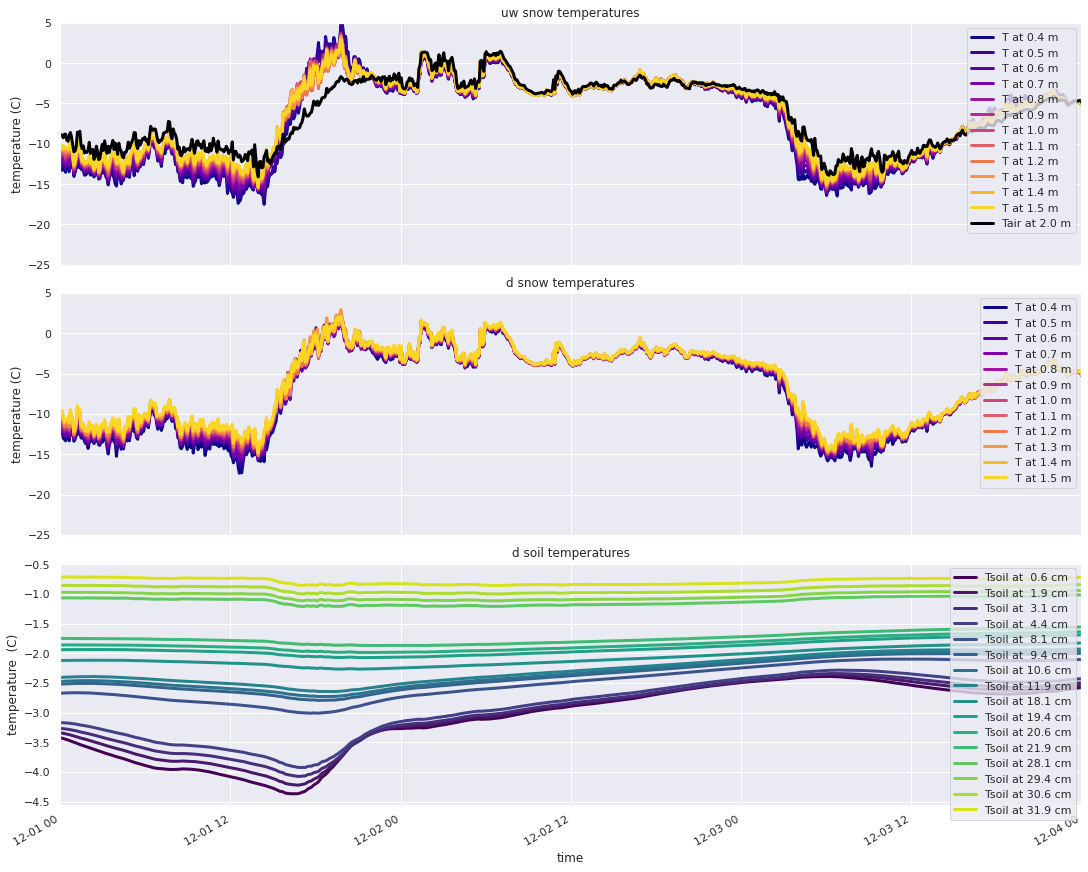

In [3]:
# Plot all the data for all three datasets 

fig, axes = plt.subplots(3, 1, figsize=(15,12), sharex=True, constrained_layout = True) #gridspec_kw={'height_ratios': [2, 2, 2, 2, 2, 2]}

width = 3 # set most of the line widths here for visualization 
colors1 = plt.cm.plasma(np.linspace(0, 1, 13))
colors2 = plt.cm.viridis(np.linspace(0, 1, 17))

# snow temperatures 
sosds1['Tsnow_0_4m_uw'].plot(ax=axes[0], label='T at 0.4 m', linewidth = width, color=colors1[0])
sosds1['Tsnow_0_5m_uw'].plot(ax=axes[0], label='T at 0.5 m', linewidth = width, color=colors1[1])
sosds1['Tsnow_0_6m_uw'].plot(ax=axes[0], label='T at 0.6 m', linewidth = width, color=colors1[2])
sosds1['Tsnow_0_7m_uw'].plot(ax=axes[0], label='T at 0.7 m', linewidth = width, color=colors1[3])
sosds1['Tsnow_0_8m_uw'].plot(ax=axes[0], label='T at 0.8 m', linewidth = width, color=colors1[4])
sosds1['Tsnow_0_9m_uw'].plot(ax=axes[0], label='T at 0.9 m', linewidth = width, color=colors1[5])
sosds1['Tsnow_1_0m_uw'].plot(ax=axes[0], label='T at 1.0 m', linewidth = width, color=colors1[6])
sosds1['Tsnow_1_1m_uw'].plot(ax=axes[0], label='T at 1.1 m', linewidth = width, color=colors1[7])
sosds1['Tsnow_1_2m_uw'].plot(ax=axes[0], label='T at 1.2 m', linewidth = width, color=colors1[8])
sosds1['Tsnow_1_3m_uw'].plot(ax=axes[0], label='T at 1.3 m', linewidth = width, color=colors1[9])
sosds1['Tsnow_1_4m_uw'].plot(ax=axes[0], label='T at 1.4 m', linewidth = width, color=colors1[10])
sosds1['Tsnow_1_5m_uw'].plot(ax=axes[0], label='T at 1.5 m', linewidth = width, color=colors1[11])

sosds1['T_2m_c'].plot(ax=axes[0],        label='Tair at 2.0 m', linewidth=3,    color='black') # Add on the 2 m air temperature here for comparison

# snow temperatures 
sosds1['Tsnow_0_4m_d'].plot(ax=axes[1], label='T at 0.4 m', linewidth = width, color=colors1[0])
sosds1['Tsnow_0_5m_d'].plot(ax=axes[1], label='T at 0.5 m', linewidth = width, color=colors1[1])
sosds1['Tsnow_0_6m_d'].plot(ax=axes[1], label='T at 0.6 m', linewidth = width, color=colors1[2])
sosds1['Tsnow_0_7m_d'].plot(ax=axes[1], label='T at 0.7 m', linewidth = width, color=colors1[3])
sosds1['Tsnow_0_8m_d'].plot(ax=axes[1], label='T at 0.8 m', linewidth = width, color=colors1[4])
sosds1['Tsnow_0_9m_d'].plot(ax=axes[1], label='T at 0.9 m', linewidth = width, color=colors1[5])
sosds1['Tsnow_1_0m_d'].plot(ax=axes[1], label='T at 1.0 m', linewidth = width, color=colors1[6])
sosds1['Tsnow_1_1m_d'].plot(ax=axes[1], label='T at 1.1 m', linewidth = width, color=colors1[7])
sosds1['Tsnow_1_2m_d'].plot(ax=axes[1], label='T at 1.2 m', linewidth = width, color=colors1[8])
sosds1['Tsnow_1_3m_d'].plot(ax=axes[1], label='T at 1.3 m', linewidth = width, color=colors1[9])
sosds1['Tsnow_1_4m_d'].plot(ax=axes[1], label='T at 1.4 m', linewidth = width, color=colors1[10])
sosds1['Tsnow_1_5m_d'].plot(ax=axes[1], label='T at 1.5 m', linewidth = width, color=colors1[11])

# sosds1['T_2m_c'].plot(ax=axes[1],        label='Tair at 2.0 m', linewidth=3,    color='black') # Add on the 2 m air temperature here for comparison

# soil temperatures 
sosds1['Tsoil_0_6cm_d'].plot(ax=axes[2],  label='Tsoil at  0.6 cm', linewidth = width, color=colors2[0])
sosds1['Tsoil_1_9cm_d'].plot(ax=axes[2],  label='Tsoil at  1.9 cm', linewidth = width, color=colors2[1])
sosds1['Tsoil_3_1cm_d'].plot(ax=axes[2],  label='Tsoil at  3.1 cm', linewidth = width, color=colors2[2])
sosds1['Tsoil_4_4cm_d'].plot(ax=axes[2],  label='Tsoil at  4.4 cm', linewidth = width, color=colors2[3])
sosds1['Tsoil_8_1cm_d'].plot(ax=axes[2],  label='Tsoil at  8.1 cm', linewidth = width, color=colors2[4])
sosds1['Tsoil_9_4cm_d'].plot(ax=axes[2],  label='Tsoil at  9.4 cm', linewidth = width, color=colors2[5])
sosds1['Tsoil_10_6cm_d'].plot(ax=axes[2], label='Tsoil at 10.6 cm', linewidth = width, color=colors2[6])
sosds1['Tsoil_11_9cm_d'].plot(ax=axes[2], label='Tsoil at 11.9 cm', linewidth = width, color=colors2[7])
sosds1['Tsoil_18_1cm_d'].plot(ax=axes[2], label='Tsoil at 18.1 cm', linewidth = width, color=colors2[8])
sosds1['Tsoil_19_4cm_d'].plot(ax=axes[2], label='Tsoil at 19.4 cm', linewidth = width, color=colors2[9])
sosds1['Tsoil_20_6cm_d'].plot(ax=axes[2], label='Tsoil at 20.6 cm', linewidth = width, color=colors2[10])
sosds1['Tsoil_21_9cm_d'].plot(ax=axes[2], label='Tsoil at 21.9 cm', linewidth = width, color=colors2[11])
sosds1['Tsoil_28_1cm_d'].plot(ax=axes[2], label='Tsoil at 28.1 cm', linewidth = width, color=colors2[12])
sosds1['Tsoil_29_4cm_d'].plot(ax=axes[2], label='Tsoil at 29.4 cm', linewidth = width, color=colors2[13])
sosds1['Tsoil_30_6cm_d'].plot(ax=axes[2], label='Tsoil at 30.6 cm', linewidth = width, color=colors2[14])
sosds1['Tsoil_31_9cm_d'].plot(ax=axes[2], label='Tsoil at 31.9 cm', linewidth = width, color=colors2[15])

# legends et al. 
axes[0].set_title("uw snow temperatures")
axes[0].set_xlabel("")
axes[0].legend(loc='upper right')
axes[0].set_ylabel("temperature (C)")
axes[0].set_ylim([-25,5])

axes[1].set_title("d snow temperatures")
axes[1].set_xlabel("")
axes[1].legend(loc='upper right')
axes[1].set_ylabel("temperature (C)")
axes[1].set_ylim([-25,5])

axes[2].set_title("d soil temperatures")
axes[2].legend(loc='upper right')
axes[2].set_ylabel("temperature  (C)")

axes[0].set_xlim(dt.datetime(2022,12,1), dt.datetime(2022,12,4))# three days in the first range
# axes[0].set_xlim(dt.datetime(2023,2,1), dt.datetime(2023,2,4))  # three days in the second range
# axes[0].set_xlim(dt.datetime(2023,4,1), dt.datetime(2023,4,4))  # three days in the fourth range

plt.show()

#### mid season

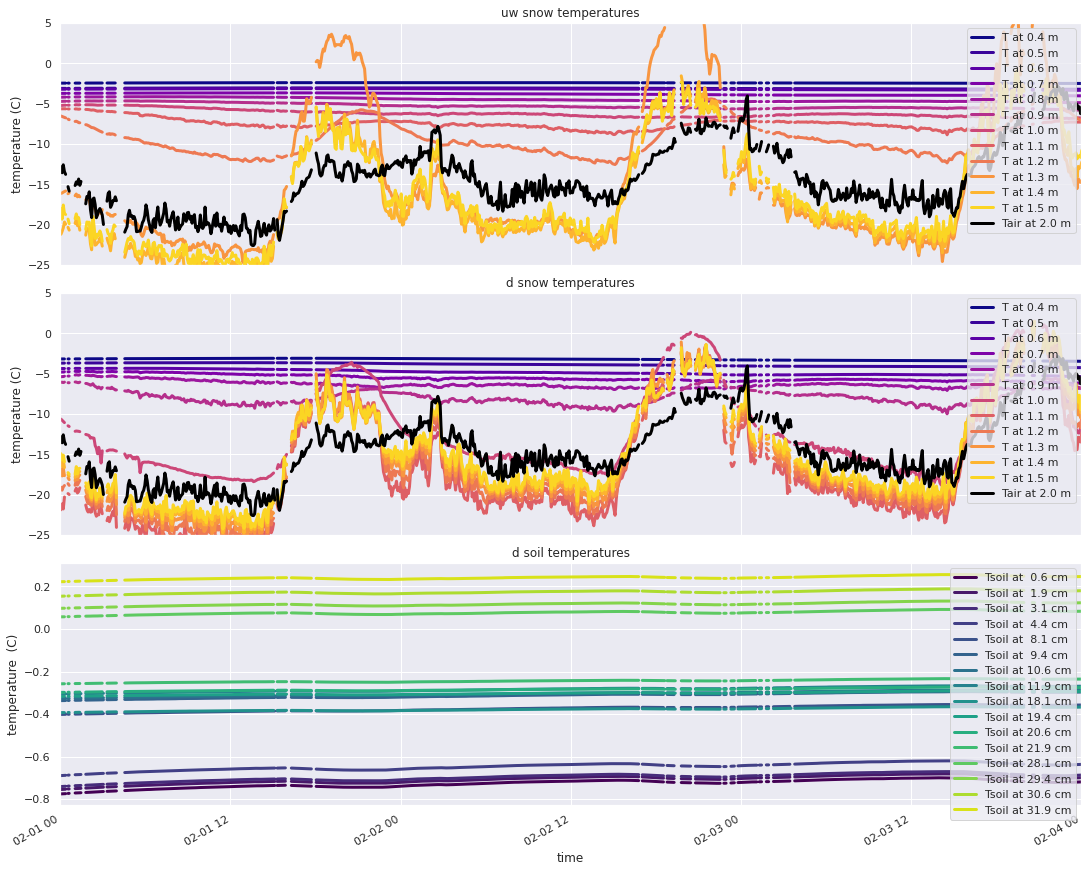

In [4]:
# Plot all the data for all three datasets 

fig, axes = plt.subplots(3, 1, figsize=(15,12), sharex=True, constrained_layout = True) #gridspec_kw={'height_ratios': [2, 2, 2, 2, 2, 2]}

width = 3 # set most of the line widths here for visualization 
colors1 = plt.cm.plasma(np.linspace(0, 1, 13))
colors2 = plt.cm.viridis(np.linspace(0, 1, 17))

# snow temperatures 
sosds2['Tsnow_0_4m_uw'].plot(ax=axes[0], label='T at 0.4 m', linewidth = width, color=colors1[0])
sosds2['Tsnow_0_5m_uw'].plot(ax=axes[0], label='T at 0.5 m', linewidth = width, color=colors1[1])
sosds2['Tsnow_0_6m_uw'].plot(ax=axes[0], label='T at 0.6 m', linewidth = width, color=colors1[2])
sosds2['Tsnow_0_7m_uw'].plot(ax=axes[0], label='T at 0.7 m', linewidth = width, color=colors1[3])
sosds2['Tsnow_0_8m_uw'].plot(ax=axes[0], label='T at 0.8 m', linewidth = width, color=colors1[4])
sosds2['Tsnow_0_9m_uw'].plot(ax=axes[0], label='T at 0.9 m', linewidth = width, color=colors1[5])
sosds2['Tsnow_1_0m_uw'].plot(ax=axes[0], label='T at 1.0 m', linewidth = width, color=colors1[6])
sosds2['Tsnow_1_1m_uw'].plot(ax=axes[0], label='T at 1.1 m', linewidth = width, color=colors1[7])
sosds2['Tsnow_1_2m_uw'].plot(ax=axes[0], label='T at 1.2 m', linewidth = width, color=colors1[8])
sosds2['Tsnow_1_3m_uw'].plot(ax=axes[0], label='T at 1.3 m', linewidth = width, color=colors1[9])
sosds2['Tsnow_1_4m_uw'].plot(ax=axes[0], label='T at 1.4 m', linewidth = width, color=colors1[10])
sosds2['Tsnow_1_5m_uw'].plot(ax=axes[0], label='T at 1.5 m', linewidth = width, color=colors1[11])

sosds2['T_2m_c'].plot(ax=axes[0],        label='Tair at 2.0 m', linewidth=3,    color='black') # Add on the 2 m air temperature here for comparison

# snow temperatures 
sosds2['Tsnow_0_4m_d'].plot(ax=axes[1], label='T at 0.4 m', linewidth = width, color=colors1[0])
sosds2['Tsnow_0_5m_d'].plot(ax=axes[1], label='T at 0.5 m', linewidth = width, color=colors1[1])
sosds2['Tsnow_0_6m_d'].plot(ax=axes[1], label='T at 0.6 m', linewidth = width, color=colors1[2])
sosds2['Tsnow_0_7m_d'].plot(ax=axes[1], label='T at 0.7 m', linewidth = width, color=colors1[3])
sosds2['Tsnow_0_8m_d'].plot(ax=axes[1], label='T at 0.8 m', linewidth = width, color=colors1[4])
sosds2['Tsnow_0_9m_d'].plot(ax=axes[1], label='T at 0.9 m', linewidth = width, color=colors1[5])
sosds2['Tsnow_1_0m_d'].plot(ax=axes[1], label='T at 1.0 m', linewidth = width, color=colors1[6])
sosds2['Tsnow_1_1m_d'].plot(ax=axes[1], label='T at 1.1 m', linewidth = width, color=colors1[7])
sosds2['Tsnow_1_2m_d'].plot(ax=axes[1], label='T at 1.2 m', linewidth = width, color=colors1[8])
sosds2['Tsnow_1_3m_d'].plot(ax=axes[1], label='T at 1.3 m', linewidth = width, color=colors1[9])
sosds2['Tsnow_1_4m_d'].plot(ax=axes[1], label='T at 1.4 m', linewidth = width, color=colors1[10])
sosds2['Tsnow_1_5m_d'].plot(ax=axes[1], label='T at 1.5 m', linewidth = width, color=colors1[11])

sosds2['T_2m_c'].plot(ax=axes[1],        label='Tair at 2.0 m', linewidth=3,    color='black') # Add on the 2 m air temperature here for comparison

# soil temperatures 
sosds2['Tsoil_0_6cm_d'].plot(ax=axes[2],  label='Tsoil at  0.6 cm', linewidth = width, color=colors2[0])
sosds2['Tsoil_1_9cm_d'].plot(ax=axes[2],  label='Tsoil at  1.9 cm', linewidth = width, color=colors2[1])
sosds2['Tsoil_3_1cm_d'].plot(ax=axes[2],  label='Tsoil at  3.1 cm', linewidth = width, color=colors2[2])
sosds2['Tsoil_4_4cm_d'].plot(ax=axes[2],  label='Tsoil at  4.4 cm', linewidth = width, color=colors2[3])
sosds2['Tsoil_8_1cm_d'].plot(ax=axes[2],  label='Tsoil at  8.1 cm', linewidth = width, color=colors2[4])
sosds2['Tsoil_9_4cm_d'].plot(ax=axes[2],  label='Tsoil at  9.4 cm', linewidth = width, color=colors2[5])
sosds2['Tsoil_10_6cm_d'].plot(ax=axes[2], label='Tsoil at 10.6 cm', linewidth = width, color=colors2[6])
sosds2['Tsoil_11_9cm_d'].plot(ax=axes[2], label='Tsoil at 11.9 cm', linewidth = width, color=colors2[7])
sosds2['Tsoil_18_1cm_d'].plot(ax=axes[2], label='Tsoil at 18.1 cm', linewidth = width, color=colors2[8])
sosds2['Tsoil_19_4cm_d'].plot(ax=axes[2], label='Tsoil at 19.4 cm', linewidth = width, color=colors2[9])
sosds2['Tsoil_20_6cm_d'].plot(ax=axes[2], label='Tsoil at 20.6 cm', linewidth = width, color=colors2[10])
sosds2['Tsoil_21_9cm_d'].plot(ax=axes[2], label='Tsoil at 21.9 cm', linewidth = width, color=colors2[11])
sosds2['Tsoil_28_1cm_d'].plot(ax=axes[2], label='Tsoil at 28.1 cm', linewidth = width, color=colors2[12])
sosds2['Tsoil_29_4cm_d'].plot(ax=axes[2], label='Tsoil at 29.4 cm', linewidth = width, color=colors2[13])
sosds2['Tsoil_30_6cm_d'].plot(ax=axes[2], label='Tsoil at 30.6 cm', linewidth = width, color=colors2[14])
sosds2['Tsoil_31_9cm_d'].plot(ax=axes[2], label='Tsoil at 31.9 cm', linewidth = width, color=colors2[15])

# legends et al. 
axes[0].set_title("uw snow temperatures")
axes[0].set_xlabel("")
axes[0].legend(loc='upper right')
axes[0].set_ylabel("temperature (C)")
axes[0].set_ylim([-25,5])

axes[1].set_title("d snow temperatures")
axes[1].set_xlabel("")
axes[1].legend(loc='upper right')
axes[1].set_ylabel("temperature (C)")
axes[1].set_ylim([-25,5])

axes[2].set_title("d soil temperatures")
axes[2].legend(loc='upper right')
axes[2].set_ylabel("temperature  (C)")

# axes[0].set_xlim(dt.datetime(2022,12,1), dt.datetime(2022,12,4))# three days in the first range
axes[0].set_xlim(dt.datetime(2023,2,1), dt.datetime(2023,2,4))  # three days in the second range
# axes[0].set_xlim(dt.datetime(2023,4,1), dt.datetime(2023,4,4))  # three days in the fourth range

plt.show()

#### late season

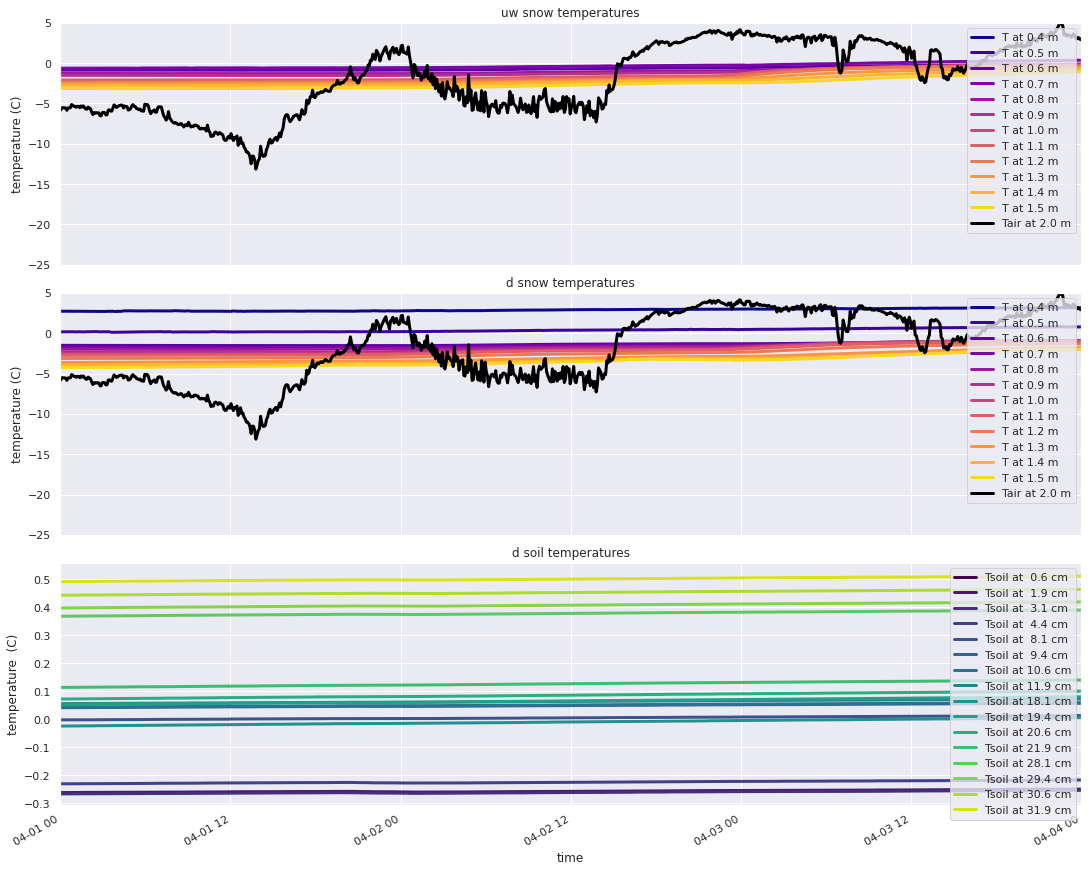

In [5]:
# Plot all the data for all three datasets 

fig, axes = plt.subplots(3, 1, figsize=(15,12), sharex=True, constrained_layout = True) #gridspec_kw={'height_ratios': [2, 2, 2, 2, 2, 2]}

width = 3 # set most of the line widths here for visualization 
colors1 = plt.cm.plasma(np.linspace(0, 1, 13))
colors2 = plt.cm.viridis(np.linspace(0, 1, 17))

# snow temperatures 
sosds3['Tsnow_0_4m_uw'].plot(ax=axes[0], label='T at 0.4 m', linewidth = width, color=colors1[0])
sosds3['Tsnow_0_5m_uw'].plot(ax=axes[0], label='T at 0.5 m', linewidth = width, color=colors1[1])
sosds3['Tsnow_0_6m_uw'].plot(ax=axes[0], label='T at 0.6 m', linewidth = width, color=colors1[2])
sosds3['Tsnow_0_7m_uw'].plot(ax=axes[0], label='T at 0.7 m', linewidth = width, color=colors1[3])
sosds3['Tsnow_0_8m_uw'].plot(ax=axes[0], label='T at 0.8 m', linewidth = width, color=colors1[4])
sosds3['Tsnow_0_9m_uw'].plot(ax=axes[0], label='T at 0.9 m', linewidth = width, color=colors1[5])
sosds3['Tsnow_1_0m_uw'].plot(ax=axes[0], label='T at 1.0 m', linewidth = width, color=colors1[6])
sosds3['Tsnow_1_1m_uw'].plot(ax=axes[0], label='T at 1.1 m', linewidth = width, color=colors1[7])
sosds3['Tsnow_1_2m_uw'].plot(ax=axes[0], label='T at 1.2 m', linewidth = width, color=colors1[8])
sosds3['Tsnow_1_3m_uw'].plot(ax=axes[0], label='T at 1.3 m', linewidth = width, color=colors1[9])
sosds3['Tsnow_1_4m_uw'].plot(ax=axes[0], label='T at 1.4 m', linewidth = width, color=colors1[10])
sosds3['Tsnow_1_5m_uw'].plot(ax=axes[0], label='T at 1.5 m', linewidth = width, color=colors1[11])

sosds3['T_2m_c'].plot(ax=axes[0],        label='Tair at 2.0 m', linewidth=3,    color='black') # Add on the 2 m air temperature here for comparison

# snow temperatures 
sosds3['Tsnow_0_4m_d'].plot(ax=axes[1], label='T at 0.4 m', linewidth = width, color=colors1[0])
sosds3['Tsnow_0_5m_d'].plot(ax=axes[1], label='T at 0.5 m', linewidth = width, color=colors1[1])
sosds3['Tsnow_0_6m_d'].plot(ax=axes[1], label='T at 0.6 m', linewidth = width, color=colors1[2])
sosds3['Tsnow_0_7m_d'].plot(ax=axes[1], label='T at 0.7 m', linewidth = width, color=colors1[3])
sosds3['Tsnow_0_8m_d'].plot(ax=axes[1], label='T at 0.8 m', linewidth = width, color=colors1[4])
sosds3['Tsnow_0_9m_d'].plot(ax=axes[1], label='T at 0.9 m', linewidth = width, color=colors1[5])
sosds3['Tsnow_1_0m_d'].plot(ax=axes[1], label='T at 1.0 m', linewidth = width, color=colors1[6])
sosds3['Tsnow_1_1m_d'].plot(ax=axes[1], label='T at 1.1 m', linewidth = width, color=colors1[7])
sosds3['Tsnow_1_2m_d'].plot(ax=axes[1], label='T at 1.2 m', linewidth = width, color=colors1[8])
sosds3['Tsnow_1_3m_d'].plot(ax=axes[1], label='T at 1.3 m', linewidth = width, color=colors1[9])
sosds3['Tsnow_1_4m_d'].plot(ax=axes[1], label='T at 1.4 m', linewidth = width, color=colors1[10])
sosds3['Tsnow_1_5m_d'].plot(ax=axes[1], label='T at 1.5 m', linewidth = width, color=colors1[11])

sosds3['T_2m_c'].plot(ax=axes[1],        label='Tair at 2.0 m', linewidth=3,    color='black') # Add on the 2 m air temperature here for comparison

# soil temperatures 
sosds3['Tsoil_0_6cm_d'].plot(ax=axes[2],  label='Tsoil at  0.6 cm', linewidth = width, color=colors2[0])
sosds3['Tsoil_1_9cm_d'].plot(ax=axes[2],  label='Tsoil at  1.9 cm', linewidth = width, color=colors2[1])
sosds3['Tsoil_3_1cm_d'].plot(ax=axes[2],  label='Tsoil at  3.1 cm', linewidth = width, color=colors2[2])
sosds3['Tsoil_4_4cm_d'].plot(ax=axes[2],  label='Tsoil at  4.4 cm', linewidth = width, color=colors2[3])
sosds3['Tsoil_8_1cm_d'].plot(ax=axes[2],  label='Tsoil at  8.1 cm', linewidth = width, color=colors2[4])
sosds3['Tsoil_9_4cm_d'].plot(ax=axes[2],  label='Tsoil at  9.4 cm', linewidth = width, color=colors2[5])
sosds3['Tsoil_10_6cm_d'].plot(ax=axes[2], label='Tsoil at 10.6 cm', linewidth = width, color=colors2[6])
sosds3['Tsoil_11_9cm_d'].plot(ax=axes[2], label='Tsoil at 11.9 cm', linewidth = width, color=colors2[7])
sosds3['Tsoil_18_1cm_d'].plot(ax=axes[2], label='Tsoil at 18.1 cm', linewidth = width, color=colors2[8])
sosds3['Tsoil_19_4cm_d'].plot(ax=axes[2], label='Tsoil at 19.4 cm', linewidth = width, color=colors2[9])
sosds3['Tsoil_20_6cm_d'].plot(ax=axes[2], label='Tsoil at 20.6 cm', linewidth = width, color=colors2[10])
sosds3['Tsoil_21_9cm_d'].plot(ax=axes[2], label='Tsoil at 21.9 cm', linewidth = width, color=colors2[11])
sosds3['Tsoil_28_1cm_d'].plot(ax=axes[2], label='Tsoil at 28.1 cm', linewidth = width, color=colors2[12])
sosds3['Tsoil_29_4cm_d'].plot(ax=axes[2], label='Tsoil at 29.4 cm', linewidth = width, color=colors2[13])
sosds3['Tsoil_30_6cm_d'].plot(ax=axes[2], label='Tsoil at 30.6 cm', linewidth = width, color=colors2[14])
sosds3['Tsoil_31_9cm_d'].plot(ax=axes[2], label='Tsoil at 31.9 cm', linewidth = width, color=colors2[15])

# legends et al. 
axes[0].set_title("uw snow temperatures")
axes[0].set_xlabel("")
axes[0].legend(loc='upper right')
axes[0].set_ylabel("temperature (C)")
axes[0].set_ylim([-25,5])

axes[1].set_title("d snow temperatures")
axes[1].set_xlabel("")
axes[1].legend(loc='upper right')
axes[1].set_ylabel("temperature (C)")
axes[1].set_ylim([-25,5])

axes[2].set_title("d soil temperatures")
axes[2].legend(loc='upper right')
axes[2].set_ylabel("temperature  (C)")

# axes[0].set_xlim(dt.datetime(2022,12,1), dt.datetime(2022,12,4))# three days in the first range
# axes[0].set_xlim(dt.datetime(2023,2,1), dt.datetime(2023,2,4))  # three days in the second range
axes[0].set_xlim(dt.datetime(2023,4,1), dt.datetime(2023,4,4))  # three days in the fourth range

plt.show()

#### put them all together to easily compare
This is going to take me way too long... I shouldn't have started. Now I need to finish. 

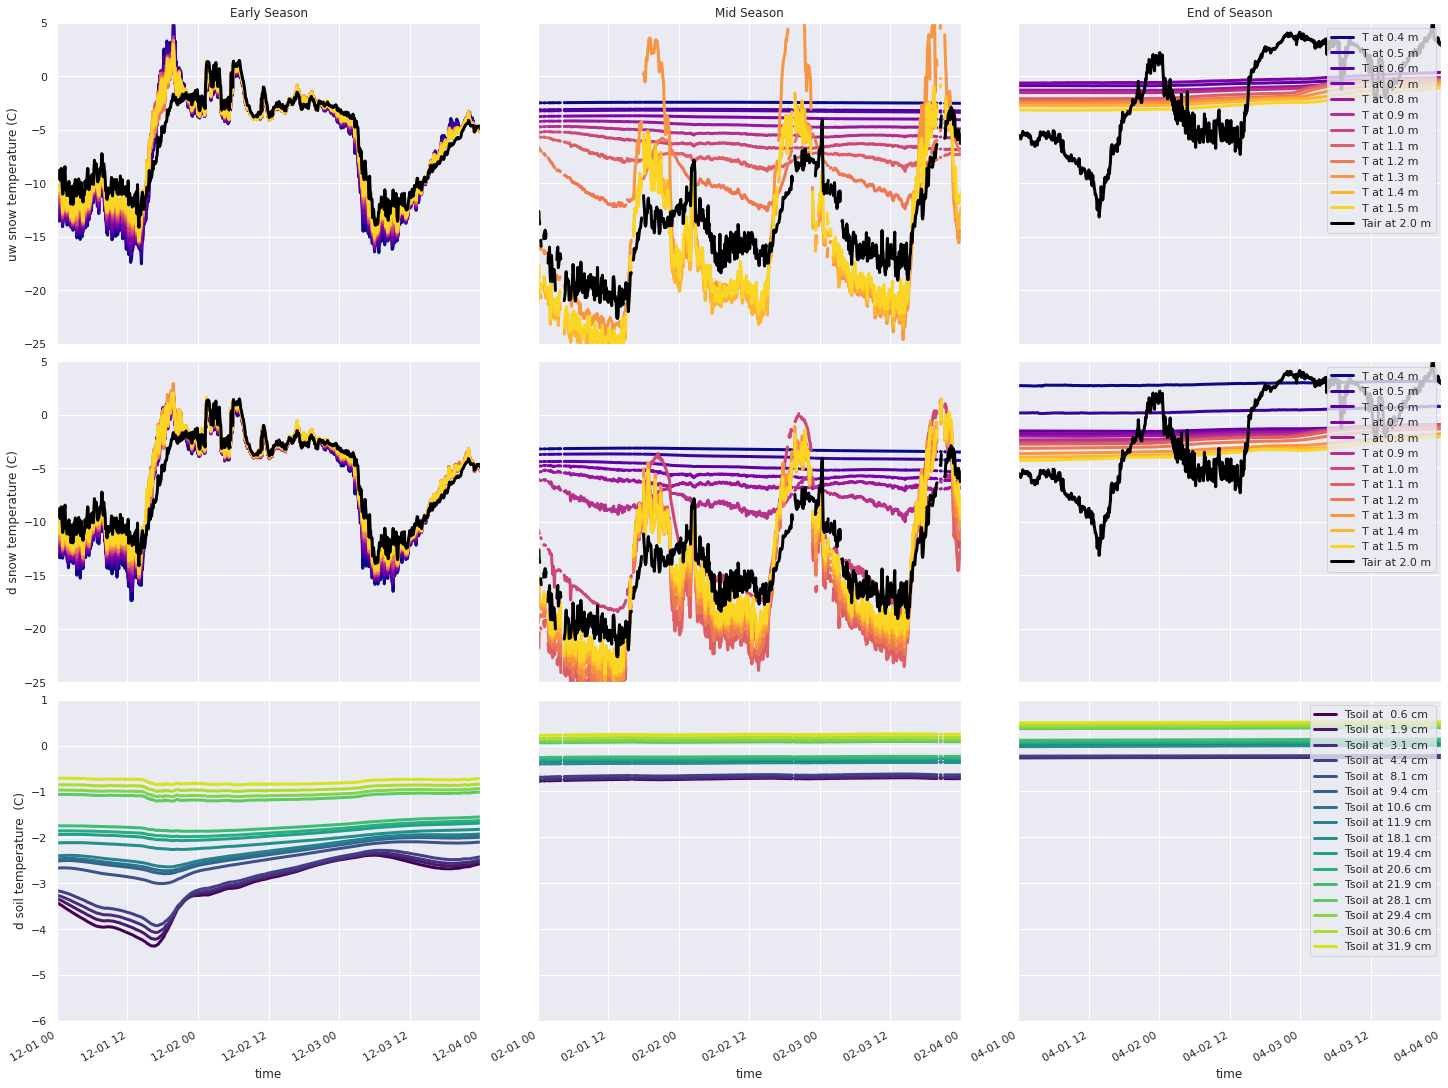

In [6]:
# Plot all the data for all three datasets 

fig, axes = plt.subplots(3, 3, figsize=(20,15), sharex='col', sharey='row', constrained_layout = True, squeeze=True) #gridspec_kw={'height_ratios': [2, 2, 2, 2, 2, 2]}

width = 3 # set most of the line widths here for visualization 
colors1 = plt.cm.plasma(np.linspace(0, 1, 13))
colors2 = plt.cm.viridis(np.linspace(0, 1, 17))

# snow temperatures ----------------------------------------------------------------------------------
# timeframe 1 
sosds1['Tsnow_0_4m_uw'].plot(ax=axes[0,0], label='T at 0.4 m', linewidth = width, color=colors1[0])
sosds1['Tsnow_0_5m_uw'].plot(ax=axes[0,0], label='T at 0.5 m', linewidth = width, color=colors1[1])
sosds1['Tsnow_0_6m_uw'].plot(ax=axes[0,0], label='T at 0.6 m', linewidth = width, color=colors1[2])
sosds1['Tsnow_0_7m_uw'].plot(ax=axes[0,0], label='T at 0.7 m', linewidth = width, color=colors1[3])
sosds1['Tsnow_0_8m_uw'].plot(ax=axes[0,0], label='T at 0.8 m', linewidth = width, color=colors1[4])
sosds1['Tsnow_0_9m_uw'].plot(ax=axes[0,0], label='T at 0.9 m', linewidth = width, color=colors1[5])
sosds1['Tsnow_1_0m_uw'].plot(ax=axes[0,0], label='T at 1.0 m', linewidth = width, color=colors1[6])
sosds1['Tsnow_1_1m_uw'].plot(ax=axes[0,0], label='T at 1.1 m', linewidth = width, color=colors1[7])
sosds1['Tsnow_1_2m_uw'].plot(ax=axes[0,0], label='T at 1.2 m', linewidth = width, color=colors1[8])
sosds1['Tsnow_1_3m_uw'].plot(ax=axes[0,0], label='T at 1.3 m', linewidth = width, color=colors1[9])
sosds1['Tsnow_1_4m_uw'].plot(ax=axes[0,0], label='T at 1.4 m', linewidth = width, color=colors1[10])
sosds1['Tsnow_1_5m_uw'].plot(ax=axes[0,0], label='T at 1.5 m', linewidth = width, color=colors1[11])
sosds1['T_2m_c'].plot(ax=axes[0,0],        label='Tair at 2.0 m', linewidth=3,    color='black') # Add on the 2 m air temperature here for comparison

# timeframe 2
sosds2['Tsnow_0_4m_uw'].plot(ax=axes[0,1], label='T at 0.4 m', linewidth = width, color=colors1[0])
sosds2['Tsnow_0_5m_uw'].plot(ax=axes[0,1], label='T at 0.5 m', linewidth = width, color=colors1[1])
sosds2['Tsnow_0_6m_uw'].plot(ax=axes[0,1], label='T at 0.6 m', linewidth = width, color=colors1[2])
sosds2['Tsnow_0_7m_uw'].plot(ax=axes[0,1], label='T at 0.7 m', linewidth = width, color=colors1[3])
sosds2['Tsnow_0_8m_uw'].plot(ax=axes[0,1], label='T at 0.8 m', linewidth = width, color=colors1[4])
sosds2['Tsnow_0_9m_uw'].plot(ax=axes[0,1], label='T at 0.9 m', linewidth = width, color=colors1[5])
sosds2['Tsnow_1_0m_uw'].plot(ax=axes[0,1], label='T at 1.0 m', linewidth = width, color=colors1[6])
sosds2['Tsnow_1_1m_uw'].plot(ax=axes[0,1], label='T at 1.1 m', linewidth = width, color=colors1[7])
sosds2['Tsnow_1_2m_uw'].plot(ax=axes[0,1], label='T at 1.2 m', linewidth = width, color=colors1[8])
sosds2['Tsnow_1_3m_uw'].plot(ax=axes[0,1], label='T at 1.3 m', linewidth = width, color=colors1[9])
sosds2['Tsnow_1_4m_uw'].plot(ax=axes[0,1], label='T at 1.4 m', linewidth = width, color=colors1[10])
sosds2['Tsnow_1_5m_uw'].plot(ax=axes[0,1], label='T at 1.5 m', linewidth = width, color=colors1[11])
sosds2['T_2m_c'].plot(ax=axes[0,1],        label='Tair at 2.0 m', linewidth=3,    color='black') # Add on the 2 m air temperature here for comparison

# timeframe 3
sosds3['Tsnow_0_4m_uw'].plot(ax=axes[0,2], label='T at 0.4 m', linewidth = width, color=colors1[0])
sosds3['Tsnow_0_5m_uw'].plot(ax=axes[0,2], label='T at 0.5 m', linewidth = width, color=colors1[1])
sosds3['Tsnow_0_6m_uw'].plot(ax=axes[0,2], label='T at 0.6 m', linewidth = width, color=colors1[2])
sosds3['Tsnow_0_7m_uw'].plot(ax=axes[0,2], label='T at 0.7 m', linewidth = width, color=colors1[3])
sosds3['Tsnow_0_8m_uw'].plot(ax=axes[0,2], label='T at 0.8 m', linewidth = width, color=colors1[4])
sosds3['Tsnow_0_9m_uw'].plot(ax=axes[0,2], label='T at 0.9 m', linewidth = width, color=colors1[5])
sosds3['Tsnow_1_0m_uw'].plot(ax=axes[0,2], label='T at 1.0 m', linewidth = width, color=colors1[6])
sosds3['Tsnow_1_1m_uw'].plot(ax=axes[0,2], label='T at 1.1 m', linewidth = width, color=colors1[7])
sosds3['Tsnow_1_2m_uw'].plot(ax=axes[0,2], label='T at 1.2 m', linewidth = width, color=colors1[8])
sosds3['Tsnow_1_3m_uw'].plot(ax=axes[0,2], label='T at 1.3 m', linewidth = width, color=colors1[9])
sosds3['Tsnow_1_4m_uw'].plot(ax=axes[0,2], label='T at 1.4 m', linewidth = width, color=colors1[10])
sosds3['Tsnow_1_5m_uw'].plot(ax=axes[0,2], label='T at 1.5 m', linewidth = width, color=colors1[11])
sosds3['T_2m_c'].plot(ax=axes[0,2],        label='Tair at 2.0 m', linewidth=3,    color='black') # Add on the 2 m air temperature here for comparison

# snow temperatures  ----------------------------------------------------------------------------------
# timeframe 1
sosds1['Tsnow_0_4m_d'].plot(ax=axes[1,0], label='T at 0.4 m', linewidth = width, color=colors1[0])
sosds1['Tsnow_0_5m_d'].plot(ax=axes[1,0], label='T at 0.5 m', linewidth = width, color=colors1[1])
sosds1['Tsnow_0_6m_d'].plot(ax=axes[1,0], label='T at 0.6 m', linewidth = width, color=colors1[2])
sosds1['Tsnow_0_7m_d'].plot(ax=axes[1,0], label='T at 0.7 m', linewidth = width, color=colors1[3])
sosds1['Tsnow_0_8m_d'].plot(ax=axes[1,0], label='T at 0.8 m', linewidth = width, color=colors1[4])
sosds1['Tsnow_0_9m_d'].plot(ax=axes[1,0], label='T at 0.9 m', linewidth = width, color=colors1[5])
sosds1['Tsnow_1_0m_d'].plot(ax=axes[1,0], label='T at 1.0 m', linewidth = width, color=colors1[6])
sosds1['Tsnow_1_1m_d'].plot(ax=axes[1,0], label='T at 1.1 m', linewidth = width, color=colors1[7])
sosds1['Tsnow_1_2m_d'].plot(ax=axes[1,0], label='T at 1.2 m', linewidth = width, color=colors1[8])
sosds1['Tsnow_1_3m_d'].plot(ax=axes[1,0], label='T at 1.3 m', linewidth = width, color=colors1[9])
sosds1['Tsnow_1_4m_d'].plot(ax=axes[1,0], label='T at 1.4 m', linewidth = width, color=colors1[10])
sosds1['Tsnow_1_5m_d'].plot(ax=axes[1,0], label='T at 1.5 m', linewidth = width, color=colors1[11])
sosds1['T_2m_c'].plot(ax=axes[1,0],        label='Tair at 2.0 m', linewidth=3,    color='black') # Add on the 2 m air temperature here for comparison


# timeframe 2
sosds2['Tsnow_0_4m_d'].plot(ax=axes[1,1], label='T at 0.4 m', linewidth = width, color=colors1[0])
sosds2['Tsnow_0_5m_d'].plot(ax=axes[1,1], label='T at 0.5 m', linewidth = width, color=colors1[1])
sosds2['Tsnow_0_6m_d'].plot(ax=axes[1,1], label='T at 0.6 m', linewidth = width, color=colors1[2])
sosds2['Tsnow_0_7m_d'].plot(ax=axes[1,1], label='T at 0.7 m', linewidth = width, color=colors1[3])
sosds2['Tsnow_0_8m_d'].plot(ax=axes[1,1], label='T at 0.8 m', linewidth = width, color=colors1[4])
sosds2['Tsnow_0_9m_d'].plot(ax=axes[1,1], label='T at 0.9 m', linewidth = width, color=colors1[5])
sosds2['Tsnow_1_0m_d'].plot(ax=axes[1,1], label='T at 1.0 m', linewidth = width, color=colors1[6])
sosds2['Tsnow_1_1m_d'].plot(ax=axes[1,1], label='T at 1.1 m', linewidth = width, color=colors1[7])
sosds2['Tsnow_1_2m_d'].plot(ax=axes[1,1], label='T at 1.2 m', linewidth = width, color=colors1[8])
sosds2['Tsnow_1_3m_d'].plot(ax=axes[1,1], label='T at 1.3 m', linewidth = width, color=colors1[9])
sosds2['Tsnow_1_4m_d'].plot(ax=axes[1,1], label='T at 1.4 m', linewidth = width, color=colors1[10])
sosds2['Tsnow_1_5m_d'].plot(ax=axes[1,1], label='T at 1.5 m', linewidth = width, color=colors1[11])
sosds2['T_2m_c'].plot(ax=axes[1,1],        label='Tair at 2.0 m', linewidth=3,    color='black') # Add on the 2 m air temperature here for comparison


# timeframe 3
sosds3['Tsnow_0_4m_d'].plot(ax=axes[1,2], label='T at 0.4 m', linewidth = width, color=colors1[0])
sosds3['Tsnow_0_5m_d'].plot(ax=axes[1,2], label='T at 0.5 m', linewidth = width, color=colors1[1])
sosds3['Tsnow_0_6m_d'].plot(ax=axes[1,2], label='T at 0.6 m', linewidth = width, color=colors1[2])
sosds3['Tsnow_0_7m_d'].plot(ax=axes[1,2], label='T at 0.7 m', linewidth = width, color=colors1[3])
sosds3['Tsnow_0_8m_d'].plot(ax=axes[1,2], label='T at 0.8 m', linewidth = width, color=colors1[4])
sosds3['Tsnow_0_9m_d'].plot(ax=axes[1,2], label='T at 0.9 m', linewidth = width, color=colors1[5])
sosds3['Tsnow_1_0m_d'].plot(ax=axes[1,2], label='T at 1.0 m', linewidth = width, color=colors1[6])
sosds3['Tsnow_1_1m_d'].plot(ax=axes[1,2], label='T at 1.1 m', linewidth = width, color=colors1[7])
sosds3['Tsnow_1_2m_d'].plot(ax=axes[1,2], label='T at 1.2 m', linewidth = width, color=colors1[8])
sosds3['Tsnow_1_3m_d'].plot(ax=axes[1,2], label='T at 1.3 m', linewidth = width, color=colors1[9])
sosds3['Tsnow_1_4m_d'].plot(ax=axes[1,2], label='T at 1.4 m', linewidth = width, color=colors1[10])
sosds3['Tsnow_1_5m_d'].plot(ax=axes[1,2], label='T at 1.5 m', linewidth = width, color=colors1[11])
sosds3['T_2m_c'].plot(ax=axes[1,2],        label='Tair at 2.0 m', linewidth=3,    color='black') # Add on the 2 m air temperature here for comparison



# soil temperatures  ----------------------------------------------------------------------------------
# timeframe 1
sosds1['Tsoil_0_6cm_d'].plot(ax=axes[2,0],  label='Tsoil at  0.6 cm', linewidth = width, color=colors2[0])
sosds1['Tsoil_1_9cm_d'].plot(ax=axes[2,0],  label='Tsoil at  1.9 cm', linewidth = width, color=colors2[1])
sosds1['Tsoil_3_1cm_d'].plot(ax=axes[2,0],  label='Tsoil at  3.1 cm', linewidth = width, color=colors2[2])
sosds1['Tsoil_4_4cm_d'].plot(ax=axes[2,0],  label='Tsoil at  4.4 cm', linewidth = width, color=colors2[3])
sosds1['Tsoil_8_1cm_d'].plot(ax=axes[2,0],  label='Tsoil at  8.1 cm', linewidth = width, color=colors2[4])
sosds1['Tsoil_9_4cm_d'].plot(ax=axes[2,0],  label='Tsoil at  9.4 cm', linewidth = width, color=colors2[5])
sosds1['Tsoil_10_6cm_d'].plot(ax=axes[2,0], label='Tsoil at 10.6 cm', linewidth = width, color=colors2[6])
sosds1['Tsoil_11_9cm_d'].plot(ax=axes[2,0], label='Tsoil at 11.9 cm', linewidth = width, color=colors2[7])
sosds1['Tsoil_18_1cm_d'].plot(ax=axes[2,0], label='Tsoil at 18.1 cm', linewidth = width, color=colors2[8])
sosds1['Tsoil_19_4cm_d'].plot(ax=axes[2,0], label='Tsoil at 19.4 cm', linewidth = width, color=colors2[9])
sosds1['Tsoil_20_6cm_d'].plot(ax=axes[2,0], label='Tsoil at 20.6 cm', linewidth = width, color=colors2[10])
sosds1['Tsoil_21_9cm_d'].plot(ax=axes[2,0], label='Tsoil at 21.9 cm', linewidth = width, color=colors2[11])
sosds1['Tsoil_28_1cm_d'].plot(ax=axes[2,0], label='Tsoil at 28.1 cm', linewidth = width, color=colors2[12])
sosds1['Tsoil_29_4cm_d'].plot(ax=axes[2,0], label='Tsoil at 29.4 cm', linewidth = width, color=colors2[13])
sosds1['Tsoil_30_6cm_d'].plot(ax=axes[2,0], label='Tsoil at 30.6 cm', linewidth = width, color=colors2[14])
sosds1['Tsoil_31_9cm_d'].plot(ax=axes[2,0], label='Tsoil at 31.9 cm', linewidth = width, color=colors2[15])

# timeframe 2
sosds2['Tsoil_0_6cm_d'].plot(ax=axes[2,1],  label='Tsoil at  0.6 cm', linewidth = width, color=colors2[0])
sosds2['Tsoil_1_9cm_d'].plot(ax=axes[2,1],  label='Tsoil at  1.9 cm', linewidth = width, color=colors2[1])
sosds2['Tsoil_3_1cm_d'].plot(ax=axes[2,1],  label='Tsoil at  3.1 cm', linewidth = width, color=colors2[2])
sosds2['Tsoil_4_4cm_d'].plot(ax=axes[2,1],  label='Tsoil at  4.4 cm', linewidth = width, color=colors2[3])
sosds2['Tsoil_8_1cm_d'].plot(ax=axes[2,1],  label='Tsoil at  8.1 cm', linewidth = width, color=colors2[4])
sosds2['Tsoil_9_4cm_d'].plot(ax=axes[2,1],  label='Tsoil at  9.4 cm', linewidth = width, color=colors2[5])
sosds2['Tsoil_10_6cm_d'].plot(ax=axes[2,1], label='Tsoil at 10.6 cm', linewidth = width, color=colors2[6])
sosds2['Tsoil_11_9cm_d'].plot(ax=axes[2,1], label='Tsoil at 11.9 cm', linewidth = width, color=colors2[7])
sosds2['Tsoil_18_1cm_d'].plot(ax=axes[2,1], label='Tsoil at 18.1 cm', linewidth = width, color=colors2[8])
sosds2['Tsoil_19_4cm_d'].plot(ax=axes[2,1], label='Tsoil at 19.4 cm', linewidth = width, color=colors2[9])
sosds2['Tsoil_20_6cm_d'].plot(ax=axes[2,1], label='Tsoil at 20.6 cm', linewidth = width, color=colors2[10])
sosds2['Tsoil_21_9cm_d'].plot(ax=axes[2,1], label='Tsoil at 21.9 cm', linewidth = width, color=colors2[11])
sosds2['Tsoil_28_1cm_d'].plot(ax=axes[2,1], label='Tsoil at 28.1 cm', linewidth = width, color=colors2[12])
sosds2['Tsoil_29_4cm_d'].plot(ax=axes[2,1], label='Tsoil at 29.4 cm', linewidth = width, color=colors2[13])
sosds2['Tsoil_30_6cm_d'].plot(ax=axes[2,1], label='Tsoil at 30.6 cm', linewidth = width, color=colors2[14])
sosds2['Tsoil_31_9cm_d'].plot(ax=axes[2,1], label='Tsoil at 31.9 cm', linewidth = width, color=colors2[15])

# timeframe 2
# timeframe 2
sosds3['Tsoil_0_6cm_d'].plot(ax=axes[2,2],  label='Tsoil at  0.6 cm', linewidth = width, color=colors2[0])
sosds3['Tsoil_1_9cm_d'].plot(ax=axes[2,2],  label='Tsoil at  1.9 cm', linewidth = width, color=colors2[1])
sosds3['Tsoil_3_1cm_d'].plot(ax=axes[2,2],  label='Tsoil at  3.1 cm', linewidth = width, color=colors2[2])
sosds3['Tsoil_4_4cm_d'].plot(ax=axes[2,2],  label='Tsoil at  4.4 cm', linewidth = width, color=colors2[3])
sosds3['Tsoil_8_1cm_d'].plot(ax=axes[2,2],  label='Tsoil at  8.1 cm', linewidth = width, color=colors2[4])
sosds3['Tsoil_9_4cm_d'].plot(ax=axes[2,2],  label='Tsoil at  9.4 cm', linewidth = width, color=colors2[5])
sosds3['Tsoil_10_6cm_d'].plot(ax=axes[2,2], label='Tsoil at 10.6 cm', linewidth = width, color=colors2[6])
sosds3['Tsoil_11_9cm_d'].plot(ax=axes[2,2], label='Tsoil at 11.9 cm', linewidth = width, color=colors2[7])
sosds3['Tsoil_18_1cm_d'].plot(ax=axes[2,2], label='Tsoil at 18.1 cm', linewidth = width, color=colors2[8])
sosds3['Tsoil_19_4cm_d'].plot(ax=axes[2,2], label='Tsoil at 19.4 cm', linewidth = width, color=colors2[9])
sosds3['Tsoil_20_6cm_d'].plot(ax=axes[2,2], label='Tsoil at 20.6 cm', linewidth = width, color=colors2[10])
sosds3['Tsoil_21_9cm_d'].plot(ax=axes[2,2], label='Tsoil at 21.9 cm', linewidth = width, color=colors2[11])
sosds3['Tsoil_28_1cm_d'].plot(ax=axes[2,2], label='Tsoil at 28.1 cm', linewidth = width, color=colors2[12])
sosds3['Tsoil_29_4cm_d'].plot(ax=axes[2,2], label='Tsoil at 29.4 cm', linewidth = width, color=colors2[13])
sosds3['Tsoil_30_6cm_d'].plot(ax=axes[2,2], label='Tsoil at 30.6 cm', linewidth = width, color=colors2[14])
sosds3['Tsoil_31_9cm_d'].plot(ax=axes[2,2], label='Tsoil at 31.9 cm', linewidth = width, color=colors2[15])

# dateranges for all columns to match ---------------------------------------------------------------
axes[0,0].set_xlim(dt.datetime(2022,12,1), dt.datetime(2022,12,4))# three days in the first range
axes[1,0].set_xlim(dt.datetime(2022,12,1), dt.datetime(2022,12,4))# three days in the first range
axes[2,0].set_xlim(dt.datetime(2022,12,1), dt.datetime(2022,12,4))# three days in the first range

axes[0,1].set_xlim(dt.datetime(2023,2,1), dt.datetime(2023,2,4))  # three days in the second range
axes[1,1].set_xlim(dt.datetime(2023,2,1), dt.datetime(2023,2,4))  # three days in the second range
axes[2,1].set_xlim(dt.datetime(2023,2,1), dt.datetime(2023,2,4))  # three days in the second range

axes[0,2].set_xlim(dt.datetime(2023,4,1), dt.datetime(2023,4,4))  # three days in the fourth range
axes[1,2].set_xlim(dt.datetime(2023,4,1), dt.datetime(2023,4,4))  # three days in the fourth range
axes[2,2].set_xlim(dt.datetime(2023,4,1), dt.datetime(2023,4,4))  # three days in the fourth range


# legends et al.  ----------------------------------------------------------------------------------
axes[0,0].set_title('Early Season')
axes[0,1].set_title('Mid Season')
axes[0,2].set_title('End of Season')

axes[0,0].set_ylabel("uw snow temperature (C)")
axes[1,0].set_ylabel("d snow temperature (C)")
axes[2,0].set_ylabel("d soil temperature  (C)")

axes[0,0].set_ylim([-25,5])
axes[0,1].set_ylim([-25,5])
axes[0,2].set_ylim([-25,5])

axes[0,0].set_xlabel("")
axes[0,1].set_xlabel("")
axes[0,2].set_xlabel("")
axes[1,0].set_xlabel("")
axes[1,1].set_xlabel("")
axes[1,2].set_xlabel("")

# axes[0,0].set_ylabel("")
# axes[1,0].set_ylabel("")
# axes[2,0].set_ylabel("")

axes[0,1].set_ylabel("")
axes[1,1].set_ylabel("")
axes[2,1].set_ylabel("")

axes[0,2].set_ylabel("")
axes[1,2].set_ylabel("")
axes[2,2].set_ylabel("")

axes[1,0].set_ylim([-25,5])
axes[1,1].set_ylim([-25,5])
axes[1,2].set_ylim([-25,5])

axes[2,0].set_ylim([-25,5])
axes[2,1].set_ylim([-25,5])
axes[1,2].set_ylim([-25,5])

axes[2,0].set_ylim([-6,1])
axes[2,1].set_ylim([-6,1])
axes[2,2].set_ylim([-6,1])

axes[0,2].legend(loc='upper right')
axes[1,2].legend(loc='upper right')
axes[2,2].legend(loc='upper right')

plt.show()

----------------------------------
### Problem 1: Solution
I selected the following 3 days for each period. 
* **Early Season:** first few days in December
    * None of the snow temperature sensors appear to be in the snow (at either of the sites), since they are all following air temperature closely 
    * Another way to see this is the very cold soil temperatures in early season before the snowpack is insulating the soil
* **Mid Season:** first few days in Feb
    * I appears that the first snow temperature sensors are buried, up until 1.2m at **uw**, and 1.0m at site **d**
    * You can clearly see the temperature gradient in the snowpack (super cool!) and then once the snowpack is gone, the sensors start following air temperatures again
    * And, finally, the soil temperature is increased (compared to early season) which makes me think the snowpack is established now and is at least deep enough to insulate 
* **Late Season:** first few days in April
    * Now, all the snow temperature sensors are buried at both sites. 
    * And, you can see all the snowpack layers.. and of course, soil layers again (insulated by the snow)
    
Sensors that seem to be acting weird or are broken (or at just against a hot stick in the snowpack? idk could be anything): 
* It appears that in the late season, the sensors measuring at 0.4 m are measuring the snow temperature as greater than 0. This is a red flag... or a new scientific discovery that snow can be > 0C. 
* I'm interested in why temperature at 1.3 m for **uw** mid-season is recording much higher temperatures than air temperature or the other (very closely spaced) sensors? 
 
----------------------------------

---------------------------------------------------

## Problem 2: Calculating atmospheric stability
#### Static stability is related to the change in temperature with height. *If you choose to use the sounding data, you must be sure to use potential temperature.*
#### For this problem, just focus on our data from the surface to 20 m, and it's okay to just use temperature within that narrow elevation range. 
#### The change in temperature with height above the surface is a measure of the *stability.*

#### Pick out three different days in our dataset and calculate dT/dz over the first 2 meters and over the first 20 meters. 
#### Make plots of temperature vs elevation. 
* Is the change in temperature with height linear? 
* Does that depend on the day? 
* What do you think controls the change in temperature with height over the snow? 

Feel free to plot some other variables from earlier labs to test your hypotheses.
* Lab 6-4 includes more of atmospheric stability over a greater range of heights using the sounding data from SAIL.

---------------------------------------------------

In [7]:
sosds4 = xr.open_dataset('sos_dataset_Apr01_set2.nc')

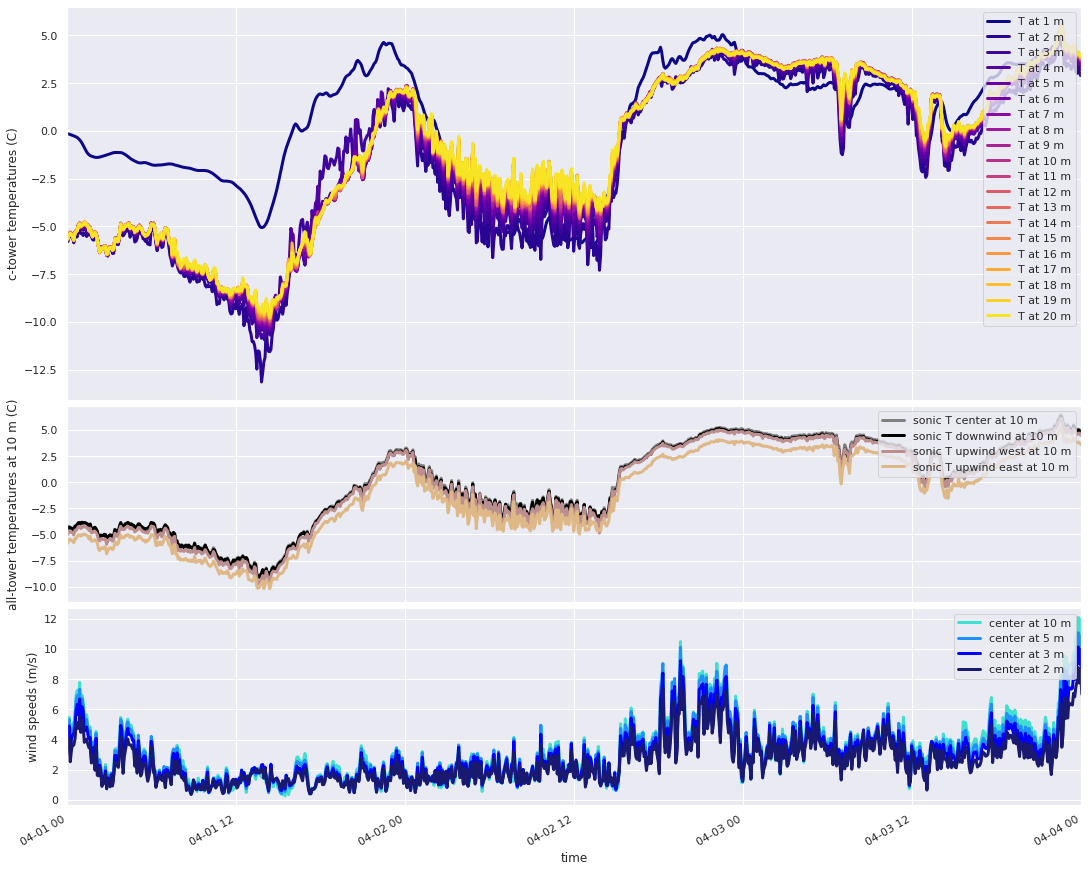

In [8]:
#first, let's make a plot with all of the data, not aggregated to hourly

fig, axes = plt.subplots(3, 1, figsize=(15,12), sharex=True, constrained_layout=True, squeeze=True, gridspec_kw={'height_ratios': [2, 1, 1]})

width = 3 # set most of the line widths here for visualization
colors1 = plt.cm.plasma(np.linspace(0, 1, 13))
colors2 = plt.cm.viridis(np.linspace(0, 1, 17))
colors3 = plt.cm.plasma(np.linspace(0, 1, 22))

# plotting sosds4 for the late-season timeframe (same as sosds3)
sosds4['T_1m_c'].plot(ax=axes[0], label='T at 1 m', linewidth = width, color=colors3[0])
sosds4['T_2m_c'].plot(ax=axes[0], label='T at 2 m', linewidth = width, color=colors3[1])
sosds4['T_3m_c'].plot(ax=axes[0], label='T at 3 m', linewidth = width, color=colors3[2])
sosds4['T_4m_c'].plot(ax=axes[0], label='T at 4 m', linewidth = width, color=colors3[3])
sosds4['T_5m_c'].plot(ax=axes[0], label='T at 5 m', linewidth = width, color=colors3[4])
sosds4['T_6m_c'].plot(ax=axes[0], label='T at 6 m', linewidth = width, color=colors3[5])
sosds4['T_7m_c'].plot(ax=axes[0], label='T at 7 m', linewidth = width, color=colors3[6])
sosds4['T_8m_c'].plot(ax=axes[0], label='T at 8 m', linewidth = width, color=colors3[7])
sosds4['T_9m_c'].plot(ax=axes[0], label='T at 9 m', linewidth = width, color=colors3[8])
sosds4['T_10m_c'].plot(ax=axes[0], label='T at 10 m', linewidth = width, color=colors3[9])
sosds4['T_11m_c'].plot(ax=axes[0], label='T at 11 m', linewidth = width, color=colors3[10])
sosds4['T_12m_c'].plot(ax=axes[0], label='T at 12 m', linewidth = width, color=colors3[12])
sosds4['T_13m_c'].plot(ax=axes[0], label='T at 13 m', linewidth = width, color=colors3[13])
sosds4['T_14m_c'].plot(ax=axes[0], label='T at 14 m', linewidth = width, color=colors3[14])
sosds4['T_15m_c'].plot(ax=axes[0], label='T at 15 m', linewidth = width, color=colors3[15])
sosds4['T_16m_c'].plot(ax=axes[0], label='T at 16 m', linewidth = width, color=colors3[16])
sosds4['T_17m_c'].plot(ax=axes[0], label='T at 17 m', linewidth = width, color=colors3[17])
sosds4['T_18m_c'].plot(ax=axes[0], label='T at 18 m', linewidth = width, color=colors3[18])
sosds4['T_19m_c'].plot(ax=axes[0], label='T at 19 m', linewidth = width, color=colors3[19])
sosds4['T_20m_c'].plot(ax=axes[0], label='T at 20 m', linewidth = width, color=colors3[20])

sosds4['tc_10m_c'].plot(ax=axes[1], label='sonic T center at 10 m', linewidth = width, color='grey') 
sosds4['tc_10m_d'].plot(ax=axes[1], label='sonic T downwind at 10 m', linewidth = width, color='black') 
sosds4['tc_10m_uw'].plot(ax=axes[1], label='sonic T upwind west at 10 m', linewidth = width, color='rosybrown') 
sosds4['tc_10m_ue'].plot(ax=axes[1], label='sonic T upwind east at 10 m', linewidth = width, color='burlywood') 

#sosds['P_10m_c'].plot(ax=axes[2], label='pressure center at 10 m', linewidth = width, color='grey') 
#sosds4['P_10m_d'].plot(ax=axes[2], label='pressure downwind at 10 m', linewidth = width, color='grey') 
#sosds4['P_10m_uw'].plot(ax=axes[2], label='pressure upwind west at 10 m', linewidth = width, color='grey') 
#sosds4['P_10m_ue'].plot(ax=axes[2], label='pressure upwind east at 10 m', linewidth = width, color='grey') 

sosds4['spd_10m_c'].plot(ax=axes[2], label='center at 10 m', linewidth = width, color='turquoise') 
sosds4['spd_5m_c'].plot(ax=axes[2], label='center at 5 m', linewidth = width, color='dodgerblue') 
sosds4['spd_3m_c'].plot(ax=axes[2], label='center at 3 m', linewidth = width, color='blue') 
sosds4['spd_2m_c'].plot(ax=axes[2], label='center at 2 m', linewidth = width, color='midnightblue') 

# legends et al. 
axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[2].legend(loc='upper right')

axes[0].set_xlabel("")
axes[1].set_xlabel("")

axes[0].set_ylabel("c-tower temperatures (C)")
axes[1].set_ylabel("all-tower temperatures at 10 m (C)")
#axes[2].set_ylabel("all-tower pressures at 10 m (hPa)")
axes[2].set_ylabel("wind speeds (m/s)")

axes[0].set_xlim(dt.datetime(2023,4,1), dt.datetime(2023,4,4))  # three days in the fourth range

plt.show()

In [9]:
# calculate dt/dz and save it as a new variable in the dataframe
sosds4['T_1m_c_dz'] = sosds4['T_1m_c'] / 1
sosds4['T_2m_c_dz'] = sosds4['T_2m_c'] / 2
sosds4['T_3m_c_dz'] = sosds4['T_3m_c'] / 3
sosds4['T_4m_c_dz'] = sosds4['T_4m_c'] / 4
sosds4['T_5m_c_dz'] = sosds4['T_5m_c'] / 5
sosds4['T_6m_c_dz'] = sosds4['T_6m_c'] / 6
sosds4['T_7m_c_dz'] = sosds4['T_7m_c'] / 7
sosds4['T_8m_c_dz'] = sosds4['T_8m_c'] / 8
sosds4['T_9m_c_dz'] = sosds4['T_9m_c'] / 9
sosds4['T_10m_c_dz'] = sosds4['T_10m_c'] / 10
sosds4['T_11m_c_dz'] = sosds4['T_11m_c'] / 11
sosds4['T_12m_c_dz'] = sosds4['T_12m_c'] / 12
sosds4['T_13m_c_dz'] = sosds4['T_13m_c'] / 13
sosds4['T_14m_c_dz'] = sosds4['T_14m_c'] / 14
sosds4['T_15m_c_dz'] = sosds4['T_15m_c'] / 15
sosds4['T_16m_c_dz'] = sosds4['T_16m_c'] / 16
sosds4['T_17m_c_dz'] = sosds4['T_17m_c'] / 17
sosds4['T_18m_c_dz'] = sosds4['T_18m_c'] / 18
sosds4['T_19m_c_dz'] = sosds4['T_19m_c'] / 19
sosds4['T_20m_c_dz'] = sosds4['T_20m_c'] / 20

# sonic
sosds4['tc_10m_c_dz'] = sosds4['tc_10m_c'] / 10
sosds4['tc_10m_d_dz'] = sosds4['tc_10m_d'] / 10
sosds4['tc_10m_uw_dz']= sosds4['tc_10m_uw'] / 10
sosds4['tc_10m_ue_dz']= sosds4['tc_10m_ue'] / 10

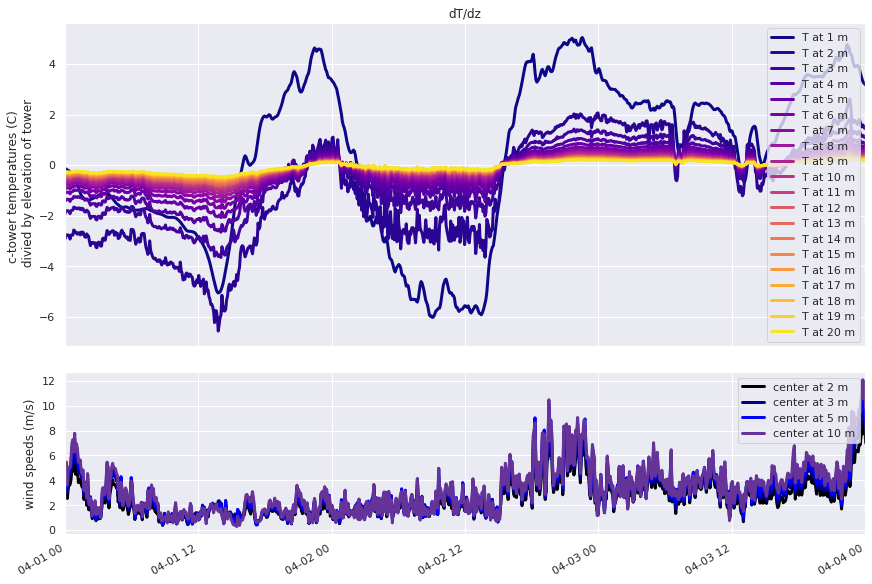

In [10]:
#first, let's make a plot with all of the data, not aggregated to hourly

fig, axes = plt.subplots(2, 1, figsize=(12,8), sharex=True, constrained_layout=True, squeeze=True, gridspec_kw={'height_ratios': [2, 1]})

width = 3 # set most of the line widths here for visualization
colors1 = plt.cm.plasma(np.linspace(0, 1, 13))
colors2 = plt.cm.viridis(np.linspace(0, 1, 17))
colors3 = plt.cm.plasma(np.linspace(0, 1, 22)) 

# plotting sosds4 for the late-season timeframe (same as sosds3)
sosds4['T_1m_c_dz'].plot(ax=axes[0], label='T at 1 m', linewidth = width, color=colors3[0])
sosds4['T_2m_c_dz'].plot(ax=axes[0], label='T at 2 m', linewidth = width, color=colors3[1])
sosds4['T_3m_c_dz'].plot(ax=axes[0], label='T at 3 m', linewidth = width, color=colors3[2])
sosds4['T_4m_c_dz'].plot(ax=axes[0], label='T at 4 m', linewidth = width, color=colors3[3])
sosds4['T_5m_c_dz'].plot(ax=axes[0], label='T at 5 m', linewidth = width, color=colors3[4])
sosds4['T_6m_c_dz'].plot(ax=axes[0], label='T at 6 m', linewidth = width, color=colors3[5])
sosds4['T_7m_c_dz'].plot(ax=axes[0], label='T at 7 m', linewidth = width, color=colors3[6])
sosds4['T_8m_c_dz'].plot(ax=axes[0], label='T at 8 m', linewidth = width, color=colors3[7])
sosds4['T_9m_c_dz'].plot(ax=axes[0], label='T at 9 m', linewidth = width, color=colors3[8])
sosds4['T_10m_c_dz'].plot(ax=axes[0], label='T at 10 m', linewidth = width, color=colors3[9])
sosds4['T_11m_c_dz'].plot(ax=axes[0], label='T at 11 m', linewidth = width, color=colors3[10])
sosds4['T_12m_c_dz'].plot(ax=axes[0], label='T at 12 m', linewidth = width, color=colors3[12])
sosds4['T_13m_c_dz'].plot(ax=axes[0], label='T at 13 m', linewidth = width, color=colors3[13])
sosds4['T_14m_c_dz'].plot(ax=axes[0], label='T at 14 m', linewidth = width, color=colors3[14])
sosds4['T_15m_c_dz'].plot(ax=axes[0], label='T at 15 m', linewidth = width, color=colors3[15])
sosds4['T_16m_c_dz'].plot(ax=axes[0], label='T at 16 m', linewidth = width, color=colors3[16])
sosds4['T_17m_c_dz'].plot(ax=axes[0], label='T at 17 m', linewidth = width, color=colors3[17])
sosds4['T_18m_c_dz'].plot(ax=axes[0], label='T at 18 m', linewidth = width, color=colors3[18])
sosds4['T_19m_c_dz'].plot(ax=axes[0], label='T at 19 m', linewidth = width, color=colors3[19])
sosds4['T_20m_c_dz'].plot(ax=axes[0], label='T at 20 m', linewidth = width, color=colors3[20])

# sonic
# sosds4['tc_10m_c_dz'].plot(ax=axes[1], label='sonic T center at 10 m', linewidth = width, color='grey') 
# sosds4['tc_10m_d_dz'].plot(ax=axes[1], label='sonic T downwind at 10 m', linewidth = width, color='black') 
# sosds4['tc_10m_uw_dz'].plot(ax=axes[1], label='sonic T upwind west at 10 m', linewidth = width, color='rosybrown') 
# sosds4['tc_10m_ue_dz'].plot(ax=axes[1], label='sonic T upwind east at 10 m', linewidth = width, color='burlywood') 

# wind speed
sosds4['spd_2m_c'].plot(ax=axes[1], label='center at 2 m', linewidth = width, color='black')
sosds4['spd_3m_c'].plot(ax=axes[1], label='center at 3 m', linewidth = width, color='darkblue') 
sosds4['spd_5m_c'].plot(ax=axes[1], label='center at 5 m', linewidth = width, color='blue') 
sosds4['spd_10m_c'].plot(ax=axes[1], label='center at 10 m', linewidth = width, color='rebeccapurple') 

# legends et al. 
# axes[0].legend(loc='center left', bbox_to_anchor=(1.04,1))
axes[0].set_title('dT/dz')
axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')

axes[0].set_xlabel("")
axes[1].set_xlabel("")

axes[0].set_ylabel("c-tower temperatures (C) \n divied by elevation of tower")
# axes[1].set_ylabel("all-tower temperatures at 10 m (C) \n divided by elevation of tower")
axes[1].set_ylabel("wind speeds (m/s)")

axes[0].set_xlim(dt.datetime(2023,4,1), dt.datetime(2023,4,4))  # three days in the fourth range

plt.show()

In [11]:
!pwd

/home/jovyan/Week6


In [12]:
# opening the sos dataset from previous homeworks to look at other variables for this timeframe
sos_ds_april=xr.open_dataset("/home/jovyan/Week5/sos_ds_april.nc")

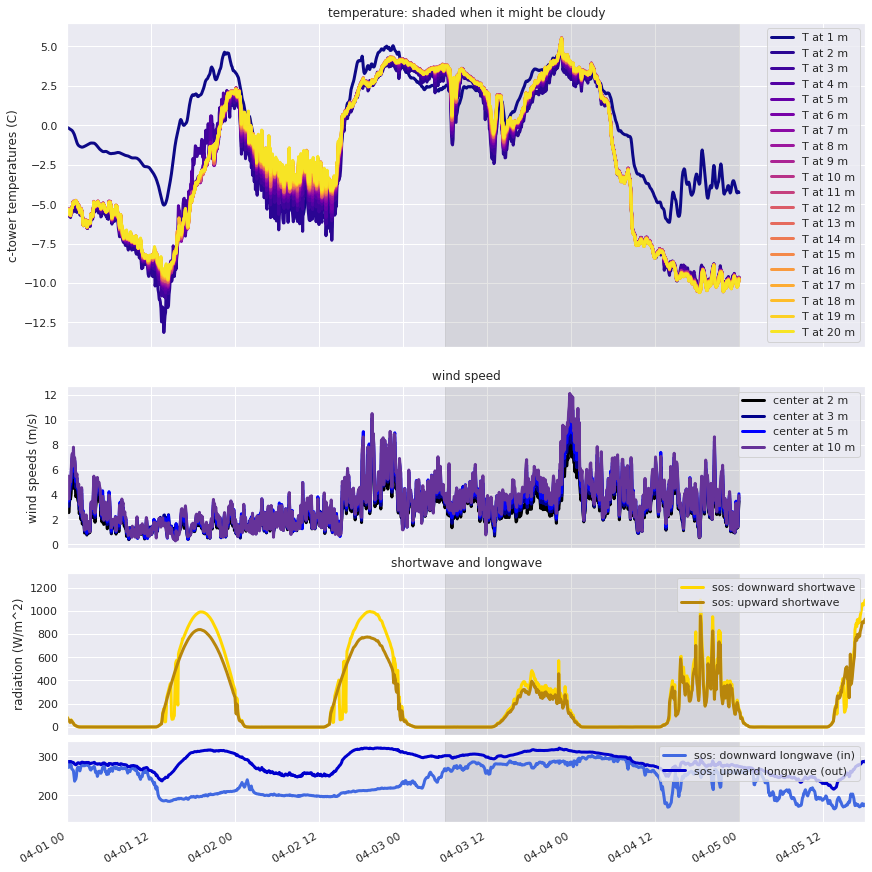

In [13]:
#first, let's make a plot with all of the data, not aggregated to hourly

fig, axes = plt.subplots(4, 1, figsize=(12,12), sharex=True, constrained_layout=True, squeeze=True, gridspec_kw={'height_ratios': [2, 1, 1, .5]})

width = 3 # set most of the line widths here for visualization
colors1 = plt.cm.plasma(np.linspace(0, 1, 13))
colors2 = plt.cm.viridis(np.linspace(0, 1, 17))
colors3 = plt.cm.plasma(np.linspace(0, 1, 22)) 

sosds4['T_1m_c'].plot(ax=axes[0], label='T at 1 m', linewidth = width, color=colors3[0])
sosds4['T_2m_c'].plot(ax=axes[0], label='T at 2 m', linewidth = width, color=colors3[1])
sosds4['T_3m_c'].plot(ax=axes[0], label='T at 3 m', linewidth = width, color=colors3[2])
sosds4['T_4m_c'].plot(ax=axes[0], label='T at 4 m', linewidth = width, color=colors3[3])
sosds4['T_5m_c'].plot(ax=axes[0], label='T at 5 m', linewidth = width, color=colors3[4])
sosds4['T_6m_c'].plot(ax=axes[0], label='T at 6 m', linewidth = width, color=colors3[5])
sosds4['T_7m_c'].plot(ax=axes[0], label='T at 7 m', linewidth = width, color=colors3[6])
sosds4['T_8m_c'].plot(ax=axes[0], label='T at 8 m', linewidth = width, color=colors3[7])
sosds4['T_9m_c'].plot(ax=axes[0], label='T at 9 m', linewidth = width, color=colors3[8])
sosds4['T_10m_c'].plot(ax=axes[0], label='T at 10 m', linewidth = width, color=colors3[9])
sosds4['T_11m_c'].plot(ax=axes[0], label='T at 11 m', linewidth = width, color=colors3[10])
sosds4['T_12m_c'].plot(ax=axes[0], label='T at 12 m', linewidth = width, color=colors3[12])
sosds4['T_13m_c'].plot(ax=axes[0], label='T at 13 m', linewidth = width, color=colors3[13])
sosds4['T_14m_c'].plot(ax=axes[0], label='T at 14 m', linewidth = width, color=colors3[14])
sosds4['T_15m_c'].plot(ax=axes[0], label='T at 15 m', linewidth = width, color=colors3[15])
sosds4['T_16m_c'].plot(ax=axes[0], label='T at 16 m', linewidth = width, color=colors3[16])
sosds4['T_17m_c'].plot(ax=axes[0], label='T at 17 m', linewidth = width, color=colors3[17])
sosds4['T_18m_c'].plot(ax=axes[0], label='T at 18 m', linewidth = width, color=colors3[18])
sosds4['T_19m_c'].plot(ax=axes[0], label='T at 19 m', linewidth = width, color=colors3[19])
sosds4['T_20m_c'].plot(ax=axes[0], label='T at 20 m', linewidth = width, color=colors3[20])

# wind speed
sosds4['spd_2m_c'].plot(ax=axes[1], label='center at 2 m', linewidth = width, color='black')
sosds4['spd_3m_c'].plot(ax=axes[1], label='center at 3 m', linewidth = width, color='darkblue') 
sosds4['spd_5m_c'].plot(ax=axes[1], label='center at 5 m', linewidth = width, color='blue') 
sosds4['spd_10m_c'].plot(ax=axes[1], label='center at 10 m', linewidth = width, color='rebeccapurple') 

# shortwave from HW5 dataset 
sos_ds_april['Rsw_in_9m_d'].plot(ax=axes[2], label='sos: downward shortwave', linewidth=width, color='gold')
sos_ds_april['Rsw_out_9m_d'].plot(ax=axes[2], label='sos: upward shortwave',linewidth=width, color='darkgoldenrod')

# longwave
sos_ds_april['LWin'].plot(ax=axes[3], label='sos: downward longwave (in)', linewidth=width, color='royalblue')
sos_ds_april['LWout'].plot(ax=axes[3], label='sos: upward longwave (out)', linewidth=width, color='mediumblue')

# shade cloudy
axes[0].axvspan(dt.datetime(2023,4,3,6), dt.datetime(2023,4,5), alpha=0.2, color='grey')
axes[1].axvspan(dt.datetime(2023,4,3,6), dt.datetime(2023,4,5), alpha=0.2, color='grey')
axes[2].axvspan(dt.datetime(2023,4,3,6), dt.datetime(2023,4,5), alpha=0.2, color='grey')
axes[3].axvspan(dt.datetime(2023,4,3,6), dt.datetime(2023,4,5), alpha=0.2, color='grey')

# legends et al. 
axes[0].set_title('temperature: shaded when it might be cloudy')
axes[1].set_title('wind speed')
axes[2].set_title('shortwave and longwave')
# axes[3].set_title('longwave')

axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[2].legend(loc='upper right')
axes[3].legend(loc='upper right')

axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[2].set_xlabel("")
axes[3].set_xlabel("")

axes[0].set_ylabel("c-tower temperatures (C)")
# axes[1].set_ylabel("all-tower temperatures at 10 m (C) \n divided by elevation of tower")
axes[1].set_ylabel("wind speeds (m/s)")
axes[2].set_ylabel("radiation (W/m^2)")
axes[3].set_ylabel("")

axes[0].set_xlim(dt.datetime(2023,4,1), dt.datetime(2023,4,5,18))  # three days in the fourth range

plt.show()

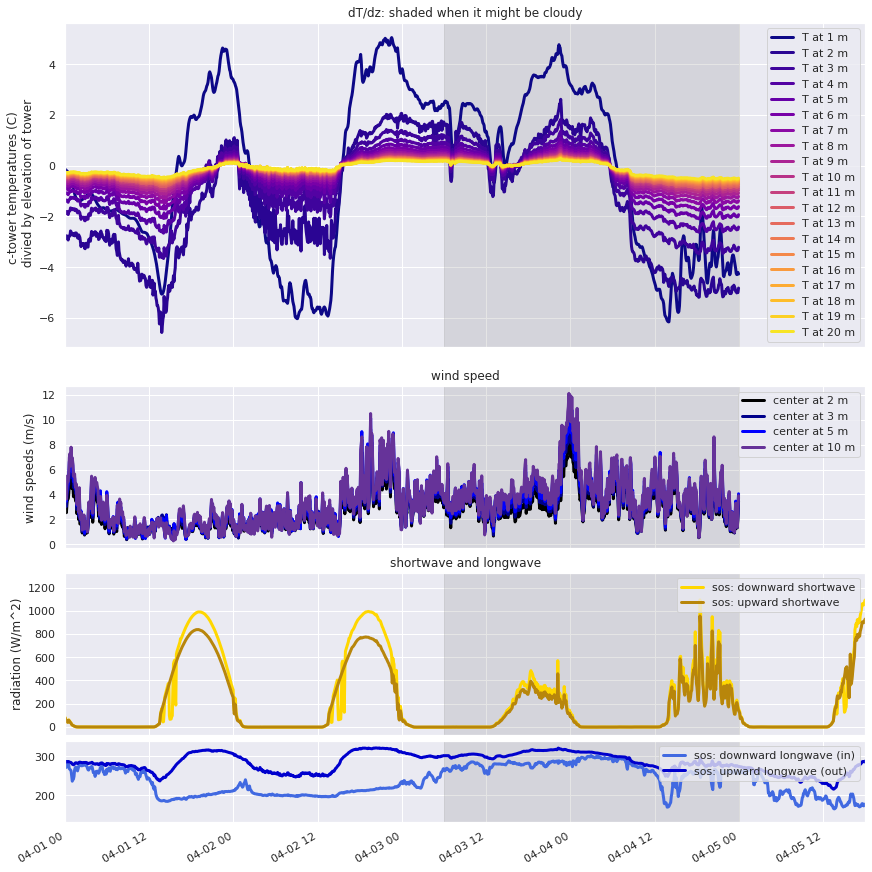

In [14]:
#first, let's make a plot with all of the data, not aggregated to hourly

fig, axes = plt.subplots(4, 1, figsize=(12,12), sharex=True, constrained_layout=True, squeeze=True, gridspec_kw={'height_ratios': [2, 1, 1, .5]})

width = 3 # set most of the line widths here for visualization
colors1 = plt.cm.plasma(np.linspace(0, 1, 13))
colors2 = plt.cm.viridis(np.linspace(0, 1, 17))
colors3 = plt.cm.plasma(np.linspace(0, 1, 22)) 

# plotting sosds4 for the late-season timeframe (same as sosds3)
sosds4['T_1m_c_dz'].plot(ax=axes[0], label='T at 1 m', linewidth = width, color=colors3[0])
sosds4['T_2m_c_dz'].plot(ax=axes[0], label='T at 2 m', linewidth = width, color=colors3[1])
sosds4['T_3m_c_dz'].plot(ax=axes[0], label='T at 3 m', linewidth = width, color=colors3[2])
sosds4['T_4m_c_dz'].plot(ax=axes[0], label='T at 4 m', linewidth = width, color=colors3[3])
sosds4['T_5m_c_dz'].plot(ax=axes[0], label='T at 5 m', linewidth = width, color=colors3[4])
sosds4['T_6m_c_dz'].plot(ax=axes[0], label='T at 6 m', linewidth = width, color=colors3[5])
sosds4['T_7m_c_dz'].plot(ax=axes[0], label='T at 7 m', linewidth = width, color=colors3[6])
sosds4['T_8m_c_dz'].plot(ax=axes[0], label='T at 8 m', linewidth = width, color=colors3[7])
sosds4['T_9m_c_dz'].plot(ax=axes[0], label='T at 9 m', linewidth = width, color=colors3[8])
sosds4['T_10m_c_dz'].plot(ax=axes[0], label='T at 10 m', linewidth = width, color=colors3[9])
sosds4['T_11m_c_dz'].plot(ax=axes[0], label='T at 11 m', linewidth = width, color=colors3[10])
sosds4['T_12m_c_dz'].plot(ax=axes[0], label='T at 12 m', linewidth = width, color=colors3[12])
sosds4['T_13m_c_dz'].plot(ax=axes[0], label='T at 13 m', linewidth = width, color=colors3[13])
sosds4['T_14m_c_dz'].plot(ax=axes[0], label='T at 14 m', linewidth = width, color=colors3[14])
sosds4['T_15m_c_dz'].plot(ax=axes[0], label='T at 15 m', linewidth = width, color=colors3[15])
sosds4['T_16m_c_dz'].plot(ax=axes[0], label='T at 16 m', linewidth = width, color=colors3[16])
sosds4['T_17m_c_dz'].plot(ax=axes[0], label='T at 17 m', linewidth = width, color=colors3[17])
sosds4['T_18m_c_dz'].plot(ax=axes[0], label='T at 18 m', linewidth = width, color=colors3[18])
sosds4['T_19m_c_dz'].plot(ax=axes[0], label='T at 19 m', linewidth = width, color=colors3[19])
sosds4['T_20m_c_dz'].plot(ax=axes[0], label='T at 20 m', linewidth = width, color=colors3[20])

# wind speed
sosds4['spd_2m_c'].plot(ax=axes[1], label='center at 2 m', linewidth = width, color='black')
sosds4['spd_3m_c'].plot(ax=axes[1], label='center at 3 m', linewidth = width, color='darkblue') 
sosds4['spd_5m_c'].plot(ax=axes[1], label='center at 5 m', linewidth = width, color='blue') 
sosds4['spd_10m_c'].plot(ax=axes[1], label='center at 10 m', linewidth = width, color='rebeccapurple') 

# shortwave from HW5 dataset 
sos_ds_april['Rsw_in_9m_d'].plot(ax=axes[2], label='sos: downward shortwave', linewidth=width, color='gold')
sos_ds_april['Rsw_out_9m_d'].plot(ax=axes[2], label='sos: upward shortwave',linewidth=width, color='darkgoldenrod')

# longwave
sos_ds_april['LWin'].plot(ax=axes[3], label='sos: downward longwave (in)', linewidth=width, color='royalblue')
sos_ds_april['LWout'].plot(ax=axes[3], label='sos: upward longwave (out)', linewidth=width, color='mediumblue')

# shade cloudy
axes[0].axvspan(dt.datetime(2023,4,3,6), dt.datetime(2023,4,5), alpha=0.2, color='grey')
axes[1].axvspan(dt.datetime(2023,4,3,6), dt.datetime(2023,4,5), alpha=0.2, color='grey')
axes[2].axvspan(dt.datetime(2023,4,3,6), dt.datetime(2023,4,5), alpha=0.2, color='grey')
axes[3].axvspan(dt.datetime(2023,4,3,6), dt.datetime(2023,4,5), alpha=0.2, color='grey')

# legends et al. 
axes[0].set_title('dT/dz: shaded when it might be cloudy')
axes[1].set_title('wind speed')
axes[2].set_title('shortwave and longwave')
# axes[3].set_title('longwave')

axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[2].legend(loc='upper right')
axes[3].legend(loc='upper right')

axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[2].set_xlabel("")
axes[3].set_xlabel("")

axes[0].set_ylabel("c-tower temperatures (C) \n divied by elevation of tower")
# axes[1].set_ylabel("all-tower temperatures at 10 m (C) \n divided by elevation of tower")
axes[1].set_ylabel("wind speeds (m/s)")
axes[2].set_ylabel("radiation (W/m^2)")
axes[3].set_ylabel("")

axes[0].set_xlim(dt.datetime(2023,4,1), dt.datetime(2023,4,5,18))  # three days in the fourth range

plt.show()

Let's try to look at temperature vs elevation

In [15]:
# create elevation value in df to plot with 
sosds4['T_1m_c_elevation'] =  sosds4['T_1m_c'].copy(deep=True)
sosds4['T_2m_c_elevation'] =  sosds4['T_1m_c'].copy(deep=True)
sosds4['T_3m_c_elevation'] =  sosds4['T_1m_c'].copy(deep=True)
sosds4['T_4m_c_elevation'] =  sosds4['T_1m_c'].copy(deep=True)
sosds4['T_5m_c_elevation'] =  sosds4['T_1m_c'].copy(deep=True)
sosds4['T_6m_c_elevation'] =  sosds4['T_1m_c'].copy(deep=True)
sosds4['T_7m_c_elevation'] =  sosds4['T_1m_c'].copy(deep=True)
sosds4['T_8m_c_elevation'] =  sosds4['T_1m_c'].copy(deep=True)
sosds4['T_9m_c_elevation'] =  sosds4['T_1m_c'].copy(deep=True)
sosds4['T_10m_c_elevation'] =  sosds4['T_1m_c'].copy(deep=True)
sosds4['T_11m_c_elevation'] =  sosds4['T_1m_c'].copy(deep=True)
sosds4['T_12m_c_elevation'] =  sosds4['T_1m_c'].copy(deep=True)
sosds4['T_13m_c_elevation'] =  sosds4['T_1m_c'].copy(deep=True)
sosds4['T_14m_c_elevation'] =  sosds4['T_1m_c'].copy(deep=True)
sosds4['T_15m_c_elevation'] =  sosds4['T_1m_c'].copy(deep=True)
sosds4['T_16m_c_elevation'] =  sosds4['T_1m_c'].copy(deep=True)
sosds4['T_17m_c_elevation'] =  sosds4['T_1m_c'].copy(deep=True)
sosds4['T_18m_c_elevation'] =  sosds4['T_1m_c'].copy(deep=True)
sosds4['T_19m_c_elevation'] =  sosds4['T_1m_c'].copy(deep=True)
sosds4['T_20m_c_elevation'] =  sosds4['T_1m_c'].copy(deep=True)

In [16]:
# create elevation value in df to plot with 
sosds4['T_1m_c_elevation'] =  sosds4['T_1m_c_elevation'].where(sosds4['T_1m_c_elevation'] > 300, 1)
sosds4['T_2m_c_elevation'] =  sosds4['T_2m_c_elevation'].where(sosds4['T_1m_c_elevation'] > 300, 2)
sosds4['T_3m_c_elevation'] =  sosds4['T_3m_c_elevation'].where(sosds4['T_1m_c_elevation'] > 300, 3)
sosds4['T_4m_c_elevation'] =  sosds4['T_4m_c_elevation'].where(sosds4['T_1m_c_elevation'] > 300, 4)
sosds4['T_5m_c_elevation'] =  sosds4['T_5m_c_elevation'].where(sosds4['T_1m_c_elevation'] > 300, 5)
sosds4['T_6m_c_elevation'] =  sosds4['T_6m_c_elevation'].where(sosds4['T_1m_c_elevation'] > 300, 6)
sosds4['T_7m_c_elevation'] =  sosds4['T_7m_c_elevation'].where(sosds4['T_1m_c_elevation'] > 300, 7)
sosds4['T_8m_c_elevation'] =  sosds4['T_8m_c_elevation'].where(sosds4['T_1m_c_elevation'] > 300, 8)
sosds4['T_9m_c_elevation'] =  sosds4['T_9m_c_elevation'].where(sosds4['T_1m_c_elevation'] > 300, 9)
sosds4['T_10m_c_elevation'] =  sosds4['T_10m_c_elevation'].where(sosds4['T_1m_c_elevation'] > 300, 10)
sosds4['T_11m_c_elevation'] =  sosds4['T_11m_c_elevation'].where(sosds4['T_1m_c_elevation'] > 300, 11)
sosds4['T_12m_c_elevation'] =  sosds4['T_12m_c_elevation'].where(sosds4['T_1m_c_elevation'] > 300, 12)
sosds4['T_13m_c_elevation'] =  sosds4['T_13m_c_elevation'].where(sosds4['T_1m_c_elevation'] > 300, 13)
sosds4['T_14m_c_elevation'] =  sosds4['T_14m_c_elevation'].where(sosds4['T_1m_c_elevation'] > 300, 14)
sosds4['T_15m_c_elevation'] =  sosds4['T_15m_c_elevation'].where(sosds4['T_1m_c_elevation'] > 300, 15)
sosds4['T_16m_c_elevation'] =  sosds4['T_16m_c_elevation'].where(sosds4['T_1m_c_elevation'] > 300, 16)
sosds4['T_17m_c_elevation'] =  sosds4['T_17m_c_elevation'].where(sosds4['T_1m_c_elevation'] > 300, 17)
sosds4['T_18m_c_elevation'] =  sosds4['T_18m_c_elevation'].where(sosds4['T_1m_c_elevation'] > 300, 18)
sosds4['T_19m_c_elevation'] =  sosds4['T_19m_c_elevation'].where(sosds4['T_1m_c_elevation'] > 300, 19)
sosds4['T_20m_c_elevation'] =  sosds4['T_20m_c_elevation'].where(sosds4['T_1m_c_elevation'] > 300, 20)

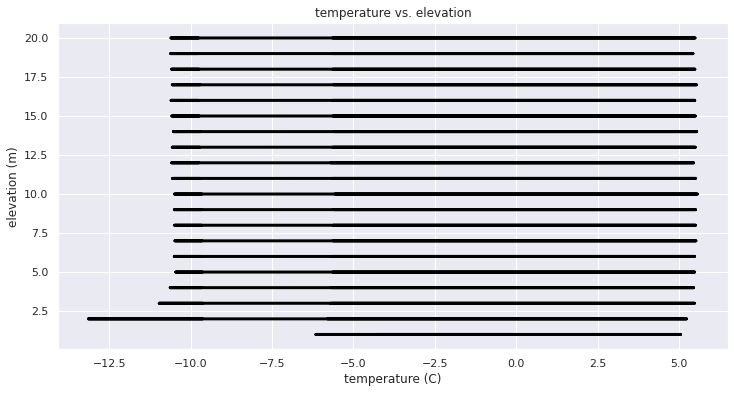

In [17]:
plt.plot(sosds4['T_1m_c'], sosds4['T_1m_c_elevation'], linewidth = width, color='black') 
plt.plot(sosds4['T_2m_c'], sosds4['T_2m_c_elevation'], linewidth = width, color='black') 
plt.plot(sosds4['T_3m_c'], sosds4['T_3m_c_elevation'], linewidth = width, color='black') 
plt.plot(sosds4['T_4m_c'], sosds4['T_4m_c_elevation'], linewidth = width, color='black') 
plt.plot(sosds4['T_5m_c'], sosds4['T_5m_c_elevation'], linewidth = width, color='black') 
plt.plot(sosds4['T_6m_c'], sosds4['T_6m_c_elevation'], linewidth = width, color='black') 
plt.plot(sosds4['T_7m_c'], sosds4['T_7m_c_elevation'], linewidth = width, color='black') 
plt.plot(sosds4['T_8m_c'], sosds4['T_8m_c_elevation'], linewidth = width, color='black') 
plt.plot(sosds4['T_9m_c'], sosds4['T_9m_c_elevation'], linewidth = width, color='black') 
plt.plot(sosds4['T_10m_c'], sosds4['T_10m_c_elevation'], linewidth = width, color='black') 

plt.plot(sosds4['T_11m_c'], sosds4['T_11m_c_elevation'], linewidth = width, color='black') 
plt.plot(sosds4['T_12m_c'], sosds4['T_12m_c_elevation'], linewidth = width, color='black') 
plt.plot(sosds4['T_13m_c'], sosds4['T_13m_c_elevation'], linewidth = width, color='black') 
plt.plot(sosds4['T_14m_c'], sosds4['T_14m_c_elevation'], linewidth = width, color='black') 
plt.plot(sosds4['T_15m_c'], sosds4['T_15m_c_elevation'], linewidth = width, color='black') 
plt.plot(sosds4['T_16m_c'], sosds4['T_16m_c_elevation'], linewidth = width, color='black') 
plt.plot(sosds4['T_17m_c'], sosds4['T_17m_c_elevation'], linewidth = width, color='black') 
plt.plot(sosds4['T_18m_c'], sosds4['T_18m_c_elevation'], linewidth = width, color='black') 
plt.plot(sosds4['T_19m_c'], sosds4['T_19m_c_elevation'], linewidth = width, color='black') 
plt.plot(sosds4['T_20m_c'], sosds4['T_20m_c_elevation'], linewidth = width, color='black') 

plt.title('temperature vs. elevation')
plt.ylabel('elevation (m)')
plt.xlabel('temperature (C)')

plt.show()

*okay, that did not work. I was trying to create a ridgeline plot... which would be cool...* but I couldn't figure it out. I'll come back if I have time and I want to keep looking. 

https://www.python-graph-gallery.com/ridgeline-graph-seaborn

#### code and data from updated lab 6-3

In [18]:
# save the datasets 
ds1 = sosds4

# combine the air temperature variables into one variable with a new 'height' dimension
height_coords = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] 
data_vars1 = [ds1[f'T_{i}m_c'] for i in height_coords]
new_da = xr.concat(data_vars1, dim='height')
new_da.coords['height'] = height_coords

# rename the new variable
new_da = new_da.rename('T')

# print the new dataset
print(new_da)

<xarray.DataArray 'T' (height: 20, time: 1152)>
array([[ -0.14305668,  -0.16711   ,  -0.18753333, ...,  -4.2463512 ,
         -4.201401  ,  -4.2682424 ],
       [ -5.794355  ,  -5.5163345 ,  -5.5243163 , ...,  -9.956683  ,
         -9.980189  ,  -9.635532  ],
       [ -5.7003765 ,  -5.41699   ,  -5.414183  , ...,  -9.895251  ,
         -9.983832  ,  -9.6262865 ],
       ...,
       [ -5.629651  ,  -5.45506   ,  -5.36359   , ..., -10.169164  ,
        -10.108703  ,  -9.742006  ],
       [ -5.649686  ,  -5.459715  ,  -5.3745437 , ..., -10.202721  ,
        -10.108819  ,  -9.767414  ],
       [ -5.636404  ,  -5.4517827 ,  -5.3553824 , ..., -10.182061  ,
        -10.113826  ,  -9.758946  ]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2023-04-01T00:02:30 ... 2023-04-04T23:57:30
  * height   (height) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
Attributes:
    long_name:   Air Temperature, NCAR hygrothermometer
    short_name:  T.1m.c
    units:       degC


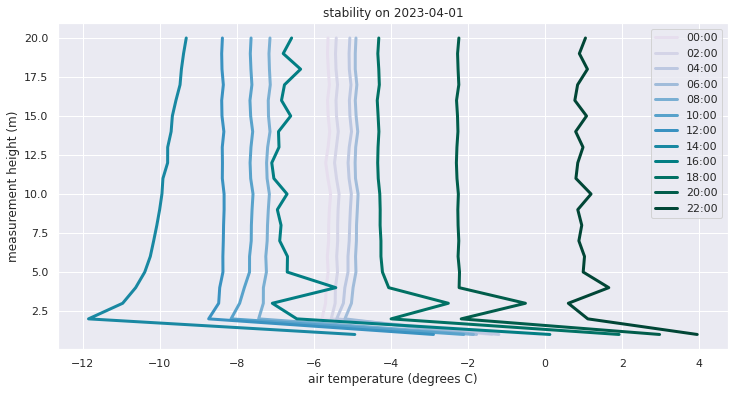

In [19]:
# Now we take a timeslice and make a vertical plot

# select a specific time slice (replace with the desired time)
# You can choose to either write out the time or just match its index using the above

# T_slice = new_da.sel(time=da_height.time[300])
aT_slice0 = new_da.sel(time='2023-04-01T00:02:30.000000000')
aT_slice1 = new_da.sel(time='2023-04-01T02:02:30.000000000')
aT_slice2 = new_da.sel(time='2023-04-01T04:02:30.000000000')
aT_slice3 = new_da.sel(time='2023-04-01T06:02:30.000000000')
aT_slice4 = new_da.sel(time='2023-04-01T08:02:30.000000000')
aT_slice5 = new_da.sel(time='2023-04-01T10:02:30.000000000')
aT_slice6 = new_da.sel(time='2023-04-01T12:02:30.000000000')
aT_slice7 = new_da.sel(time='2023-04-01T14:02:30.000000000')
aT_slice8 = new_da.sel(time='2023-04-01T16:02:30.000000000')
aT_slice9 = new_da.sel(time='2023-04-01T18:02:30.000000000')
aT_slice10 = new_da.sel(time='2023-04-01T20:02:30.000000000')
aT_slice11 = new_da.sel(time='2023-04-01T22:02:30.000000000')

# plot the slice of T vs. height
width=3
colors4 = plt.cm.PuBuGn(np.linspace(0, 1, 14)) 

plt.plot(aT_slice0, aT_slice0['height'], label='00:00',  linewidth = width, color=colors4[2])
plt.plot(aT_slice1, aT_slice1['height'], label='02:00',  linewidth = width, color=colors4[3])
plt.plot(aT_slice2, aT_slice2['height'], label='04:00',  linewidth = width, color=colors4[4])
plt.plot(aT_slice3, aT_slice3['height'], label='06:00',  linewidth = width, color=colors4[5])
plt.plot(aT_slice4, aT_slice4['height'], label='08:00',  linewidth = width, color=colors4[6])
plt.plot(aT_slice5, aT_slice5['height'], label='10:00', linewidth = width, color=colors4[7])
plt.plot(aT_slice6, aT_slice6['height'], label='12:00', linewidth = width, color=colors4[8])
plt.plot(aT_slice7, aT_slice7['height'], label='14:00', linewidth = width, color=colors4[9])
plt.plot(aT_slice8, aT_slice8['height'], label='16:00', linewidth = width, color=colors4[10])
plt.plot(aT_slice9, aT_slice9['height'], label='18:00', linewidth = width, color=colors4[11])
plt.plot(aT_slice10, aT_slice10['height'], label='20:00', linewidth = width, color=colors4[12])
plt.plot(aT_slice11, aT_slice11['height'], label='22:00', linewidth = width, color=colors4[13])

plt.title('stability on 2023-04-01')
plt.xlabel('air temperature (degrees C)')
plt.ylabel('measurement height (m)')
plt.legend()
plt.show()

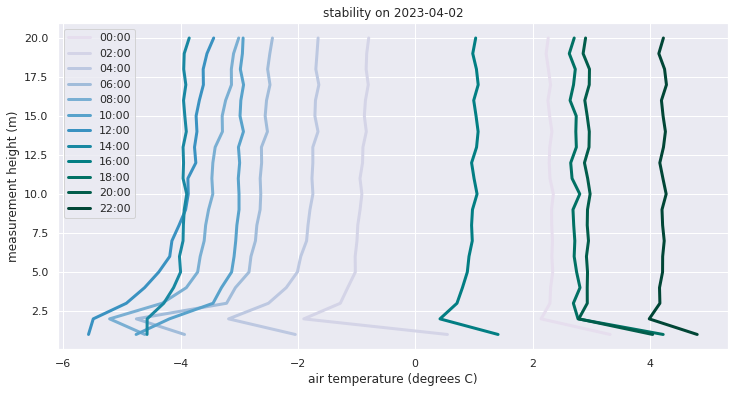

In [20]:
# Now we take a timeslice and make a vertical plot

# select a specific time slice (replace with the desired time)
# You can choose to either write out the time or just match its index using the above

# T_slice = new_da.sel(time=da_height.time[300])
bT_slice0 = new_da.sel(time='2023-04-02T00:02:30.000000000')
bT_slice1 = new_da.sel(time='2023-04-02T02:02:30.000000000')
bT_slice2 = new_da.sel(time='2023-04-02T04:02:30.000000000')
bT_slice3 = new_da.sel(time='2023-04-02T06:02:30.000000000')
bT_slice4 = new_da.sel(time='2023-04-02T08:02:30.000000000')
bT_slice5 = new_da.sel(time='2023-04-02T10:02:30.000000000')
bT_slice6 = new_da.sel(time='2023-04-02T12:02:30.000000000')
bT_slice7 = new_da.sel(time='2023-04-02T14:02:30.000000000')
bT_slice8 = new_da.sel(time='2023-04-02T16:02:30.000000000')
bT_slice9 = new_da.sel(time='2023-04-02T18:02:30.000000000')
bT_slice10 = new_da.sel(time='2023-04-02T20:02:30.000000000')
bT_slice11 = new_da.sel(time='2023-04-02T22:02:30.000000000')

# plot the slice of T vs. height
width=3
colors4 = plt.cm.PuBuGn(np.linspace(0, 1, 14)) 

plt.plot(bT_slice0, bT_slice0['height'], label='00:00',  linewidth = width, color=colors4[2])
plt.plot(bT_slice1, bT_slice1['height'], label='02:00',  linewidth = width, color=colors4[3])
plt.plot(bT_slice2, bT_slice2['height'], label='04:00',  linewidth = width, color=colors4[4])
plt.plot(bT_slice3, bT_slice3['height'], label='06:00',  linewidth = width, color=colors4[5])
plt.plot(bT_slice4, bT_slice4['height'], label='08:00',  linewidth = width, color=colors4[6])
plt.plot(bT_slice5, bT_slice5['height'], label='10:00', linewidth = width, color=colors4[7])
plt.plot(bT_slice6, bT_slice6['height'], label='12:00', linewidth = width, color=colors4[8])
plt.plot(bT_slice7, bT_slice7['height'], label='14:00', linewidth = width, color=colors4[9])
plt.plot(bT_slice8, bT_slice8['height'], label='16:00', linewidth = width, color=colors4[10])
plt.plot(bT_slice9, bT_slice9['height'], label='18:00', linewidth = width, color=colors4[11])
plt.plot(bT_slice10, bT_slice10['height'], label='20:00', linewidth = width, color=colors4[12])
plt.plot(bT_slice11, bT_slice11['height'], label='22:00', linewidth = width, color=colors4[13])

plt.title('stability on 2023-04-02')
plt.xlabel('air temperature (degrees C)')
plt.ylabel('measurement height (m)')
plt.legend()
plt.show()

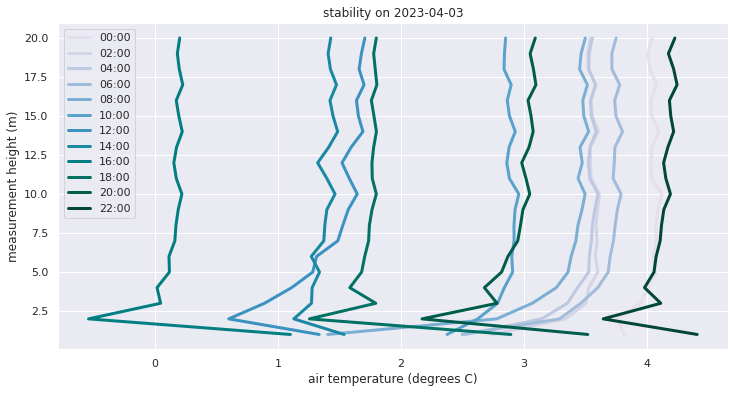

In [21]:
# Now we take a timeslice and make a vertical plot

# select a specific time slice (replace with the desired time)
# You can choose to either write out the time or just match its index using the above

# T_slice = new_da.sel(time=da_height.time[300])
cT_slice0 = new_da.sel(time='2023-04-03T00:02:30.000000000')
cT_slice1 = new_da.sel(time='2023-04-03T02:02:30.000000000')
cT_slice2 = new_da.sel(time='2023-04-03T04:02:30.000000000')
cT_slice3 = new_da.sel(time='2023-04-03T06:02:30.000000000')
cT_slice4 = new_da.sel(time='2023-04-03T08:02:30.000000000')
cT_slice5 = new_da.sel(time='2023-04-03T10:02:30.000000000')
cT_slice6 = new_da.sel(time='2023-04-03T12:02:30.000000000')
cT_slice7 = new_da.sel(time='2023-04-03T14:02:30.000000000')
cT_slice8 = new_da.sel(time='2023-04-03T16:02:30.000000000')
cT_slice9 = new_da.sel(time='2023-04-03T18:02:30.000000000')
cT_slice10 = new_da.sel(time='2023-04-03T20:02:30.000000000')
cT_slice11 = new_da.sel(time='2023-04-03T22:02:30.000000000')

# plot the slice of T vs. height
width=3
colors4 = plt.cm.PuBuGn(np.linspace(0, 1, 14)) 

plt.plot(cT_slice0, cT_slice0['height'], label='00:00',  linewidth = width, color=colors4[2])
plt.plot(cT_slice1, cT_slice1['height'], label='02:00',  linewidth = width, color=colors4[3])
plt.plot(cT_slice2, cT_slice2['height'], label='04:00',  linewidth = width, color=colors4[4])
plt.plot(cT_slice3, cT_slice3['height'], label='06:00',  linewidth = width, color=colors4[5])
plt.plot(cT_slice4, cT_slice4['height'], label='08:00',  linewidth = width, color=colors4[6])
plt.plot(cT_slice5, cT_slice5['height'], label='10:00', linewidth = width, color=colors4[7])
plt.plot(cT_slice6, cT_slice6['height'], label='12:00', linewidth = width, color=colors4[8])
plt.plot(cT_slice7, cT_slice7['height'], label='14:00', linewidth = width, color=colors4[9])
plt.plot(cT_slice8, cT_slice8['height'], label='16:00', linewidth = width, color=colors4[10])
plt.plot(cT_slice9, cT_slice9['height'], label='18:00', linewidth = width, color=colors4[11])
plt.plot(cT_slice10, cT_slice10['height'], label='20:00', linewidth = width, color=colors4[12])
plt.plot(cT_slice11, cT_slice11['height'], label='22:00', linewidth = width, color=colors4[13])

plt.title('stability on 2023-04-03')
plt.xlabel('air temperature (degrees C)')
plt.ylabel('measurement height (m)')
plt.legend()
plt.show()

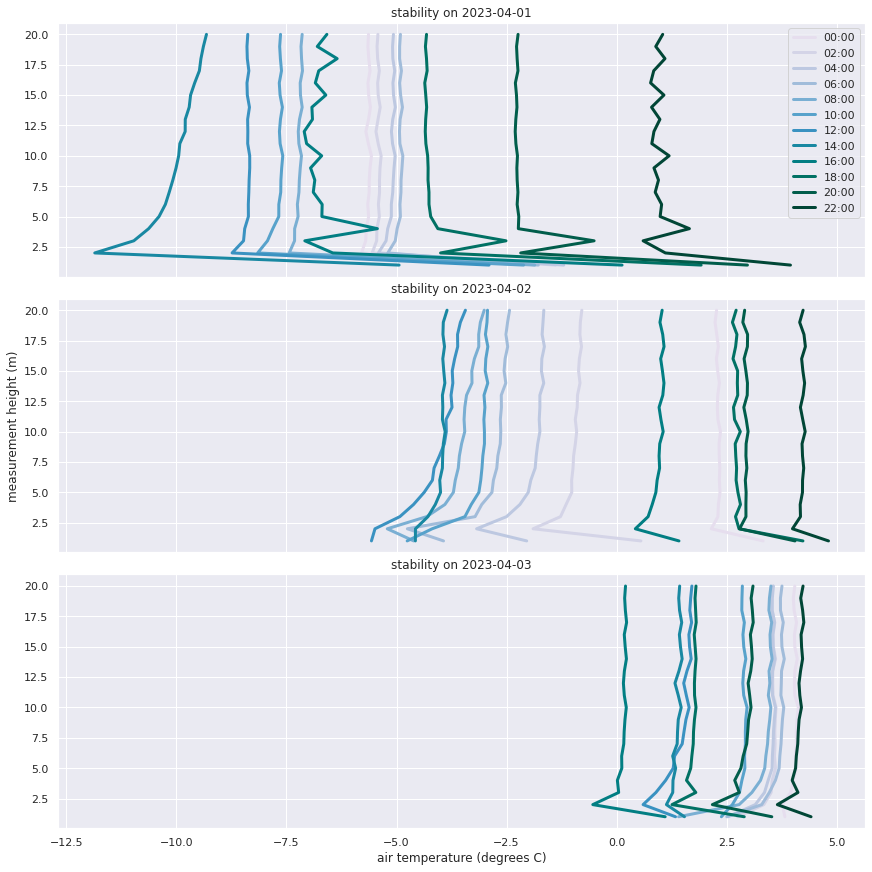

In [22]:
fig, axes = plt.subplots(3, 1, figsize=(12,12), sharex=True, sharey=True, constrained_layout=True, squeeze=True, gridspec_kw={'height_ratios': [1, 1, 1]})

width=3
colors4 = plt.cm.PuBuGn(np.linspace(0, 1, 14)) 

# day a
axes[0].plot(aT_slice0, aT_slice0['height'], label='00:00',  linewidth = width, color=colors4[2])
axes[0].plot(aT_slice1, aT_slice1['height'], label='02:00',  linewidth = width, color=colors4[3])
axes[0].plot(aT_slice2, aT_slice2['height'], label='04:00',  linewidth = width, color=colors4[4])
axes[0].plot(aT_slice3, aT_slice3['height'], label='06:00',  linewidth = width, color=colors4[5])
axes[0].plot(aT_slice4, aT_slice4['height'], label='08:00',  linewidth = width, color=colors4[6])
axes[0].plot(aT_slice5, aT_slice5['height'], label='10:00', linewidth = width, color=colors4[7])
axes[0].plot(aT_slice6, aT_slice6['height'], label='12:00', linewidth = width, color=colors4[8])
axes[0].plot(aT_slice7, aT_slice7['height'], label='14:00', linewidth = width, color=colors4[9])
axes[0].plot(aT_slice8, aT_slice8['height'], label='16:00', linewidth = width, color=colors4[10])
axes[0].plot(aT_slice9, aT_slice9['height'], label='18:00', linewidth = width, color=colors4[11])
axes[0].plot(aT_slice10, aT_slice10['height'], label='20:00', linewidth = width, color=colors4[12])
axes[0].plot(aT_slice11, aT_slice11['height'], label='22:00', linewidth = width, color=colors4[13])

# day b
axes[1].plot(bT_slice0, bT_slice0['height'], label='00:00',  linewidth = width, color=colors4[2])
axes[1].plot(bT_slice1, bT_slice1['height'], label='02:00',  linewidth = width, color=colors4[3])
axes[1].plot(bT_slice2, bT_slice2['height'], label='04:00',  linewidth = width, color=colors4[4])
axes[1].plot(bT_slice3, bT_slice3['height'], label='06:00',  linewidth = width, color=colors4[5])
axes[1].plot(bT_slice4, bT_slice4['height'], label='08:00',  linewidth = width, color=colors4[6])
axes[1].plot(bT_slice5, bT_slice5['height'], label='10:00', linewidth = width, color=colors4[7])
axes[1].plot(bT_slice6, bT_slice6['height'], label='12:00', linewidth = width, color=colors4[8])
axes[1].plot(bT_slice7, bT_slice7['height'], label='14:00', linewidth = width, color=colors4[9])
axes[1].plot(bT_slice8, bT_slice8['height'], label='16:00', linewidth = width, color=colors4[10])
axes[1].plot(bT_slice9, bT_slice9['height'], label='18:00', linewidth = width, color=colors4[11])
axes[1].plot(bT_slice10, bT_slice10['height'], label='20:00', linewidth = width, color=colors4[12])
axes[1].plot(bT_slice11, bT_slice11['height'], label='22:00', linewidth = width, color=colors4[13])

# day c
axes[2].plot(cT_slice0, cT_slice0['height'], label='00:00',  linewidth = width, color=colors4[2])
axes[2].plot(cT_slice1, cT_slice1['height'], label='02:00',  linewidth = width, color=colors4[3])
axes[2].plot(cT_slice2, cT_slice2['height'], label='04:00',  linewidth = width, color=colors4[4])
axes[2].plot(cT_slice3, cT_slice3['height'], label='06:00',  linewidth = width, color=colors4[5])
axes[2].plot(cT_slice4, cT_slice4['height'], label='08:00',  linewidth = width, color=colors4[6])
axes[2].plot(cT_slice5, cT_slice5['height'], label='10:00', linewidth = width, color=colors4[7])
axes[2].plot(cT_slice6, cT_slice6['height'], label='12:00', linewidth = width, color=colors4[8])
axes[2].plot(cT_slice7, cT_slice7['height'], label='14:00', linewidth = width, color=colors4[9])
axes[2].plot(cT_slice8, cT_slice8['height'], label='16:00', linewidth = width, color=colors4[10])
axes[2].plot(cT_slice9, cT_slice9['height'], label='18:00', linewidth = width, color=colors4[11])
axes[2].plot(cT_slice10, cT_slice10['height'], label='20:00', linewidth = width, color=colors4[12])
axes[2].plot(cT_slice11, cT_slice11['height'], label='22:00', linewidth = width, color=colors4[13])

# legends et al. 
axes[0].set_title('stability on 2023-04-01')
axes[1].set_title('stability on 2023-04-02')
axes[2].set_title('stability on 2023-04-03')

axes[2].set_xlabel('air temperature (degrees C)')
axes[1].set_ylabel('measurement height (m)')
axes[0].legend()


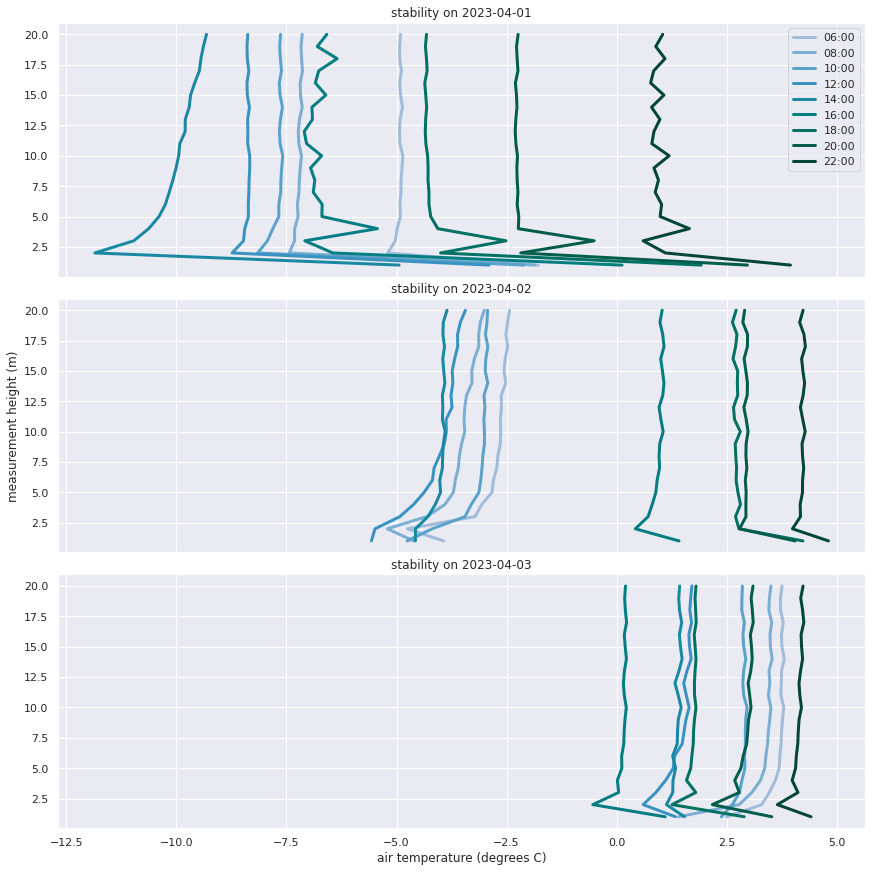

In [23]:
fig, axes = plt.subplots(3, 1, figsize=(12,12), sharex=True, sharey=True, constrained_layout=True, squeeze=True, gridspec_kw={'height_ratios': [1, 1, 1]})

width=3
colors4 = plt.cm.PuBuGn(np.linspace(0, 1, 14)) 

# day a
# axes[0].plot(aT_slice0, aT_slice0['height'], label='00:00',  linewidth = width, color=colors4[2])
# axes[0].plot(aT_slice1, aT_slice1['height'], label='02:00',  linewidth = width, color=colors4[3])
# axes[0].plot(aT_slice2, aT_slice2['height'], label='04:00',  linewidth = width, color=colors4[4])
axes[0].plot(aT_slice3, aT_slice3['height'], label='06:00',  linewidth = width, color=colors4[5])
axes[0].plot(aT_slice4, aT_slice4['height'], label='08:00',  linewidth = width, color=colors4[6])
axes[0].plot(aT_slice5, aT_slice5['height'], label='10:00', linewidth = width, color=colors4[7])
axes[0].plot(aT_slice6, aT_slice6['height'], label='12:00', linewidth = width, color=colors4[8])
axes[0].plot(aT_slice7, aT_slice7['height'], label='14:00', linewidth = width, color=colors4[9])
axes[0].plot(aT_slice8, aT_slice8['height'], label='16:00', linewidth = width, color=colors4[10])
axes[0].plot(aT_slice9, aT_slice9['height'], label='18:00', linewidth = width, color=colors4[11])
axes[0].plot(aT_slice10, aT_slice10['height'], label='20:00', linewidth = width, color=colors4[12])
axes[0].plot(aT_slice11, aT_slice11['height'], label='22:00', linewidth = width, color=colors4[13])

# day b
# axes[1].plot(bT_slice0, bT_slice0['height'], label='00:00',  linewidth = width, color=colors4[2])
# axes[1].plot(bT_slice1, bT_slice1['height'], label='02:00',  linewidth = width, color=colors4[3])
# axes[1].plot(bT_slice2, bT_slice2['height'], label='04:00',  linewidth = width, color=colors4[4])
axes[1].plot(bT_slice3, bT_slice3['height'], label='06:00',  linewidth = width, color=colors4[5])
axes[1].plot(bT_slice4, bT_slice4['height'], label='08:00',  linewidth = width, color=colors4[6])
axes[1].plot(bT_slice5, bT_slice5['height'], label='10:00', linewidth = width, color=colors4[7])
axes[1].plot(bT_slice6, bT_slice6['height'], label='12:00', linewidth = width, color=colors4[8])
axes[1].plot(bT_slice7, bT_slice7['height'], label='14:00', linewidth = width, color=colors4[9])
axes[1].plot(bT_slice8, bT_slice8['height'], label='16:00', linewidth = width, color=colors4[10])
axes[1].plot(bT_slice9, bT_slice9['height'], label='18:00', linewidth = width, color=colors4[11])
axes[1].plot(bT_slice10, bT_slice10['height'], label='20:00', linewidth = width, color=colors4[12])
axes[1].plot(bT_slice11, bT_slice11['height'], label='22:00', linewidth = width, color=colors4[13])

# day c
# axes[2].plot(cT_slice0, cT_slice0['height'], label='00:00',  linewidth = width, color=colors4[2])
# axes[2].plot(cT_slice1, cT_slice1['height'], label='02:00',  linewidth = width, color=colors4[3])
# axes[2].plot(cT_slice2, cT_slice2['height'], label='04:00',  linewidth = width, color=colors4[4])
axes[2].plot(cT_slice3, cT_slice3['height'], label='06:00',  linewidth = width, color=colors4[5])
axes[2].plot(cT_slice4, cT_slice4['height'], label='08:00',  linewidth = width, color=colors4[6])
axes[2].plot(cT_slice5, cT_slice5['height'], label='10:00', linewidth = width, color=colors4[7])
axes[2].plot(cT_slice6, cT_slice6['height'], label='12:00', linewidth = width, color=colors4[8])
axes[2].plot(cT_slice7, cT_slice7['height'], label='14:00', linewidth = width, color=colors4[9])
axes[2].plot(cT_slice8, cT_slice8['height'], label='16:00', linewidth = width, color=colors4[10])
axes[2].plot(cT_slice9, cT_slice9['height'], label='18:00', linewidth = width, color=colors4[11])
axes[2].plot(cT_slice10, cT_slice10['height'], label='20:00', linewidth = width, color=colors4[12])
axes[2].plot(cT_slice11, cT_slice11['height'], label='22:00', linewidth = width, color=colors4[13])

# legends et al. 
axes[0].set_title('stability on 2023-04-01')
axes[1].set_title('stability on 2023-04-02')
axes[2].set_title('stability on 2023-04-03')

axes[2].set_xlabel('air temperature (degrees C)')
axes[1].set_ylabel('measurement height (m)')
axes[0].legend()


(-12.0, 5.0)

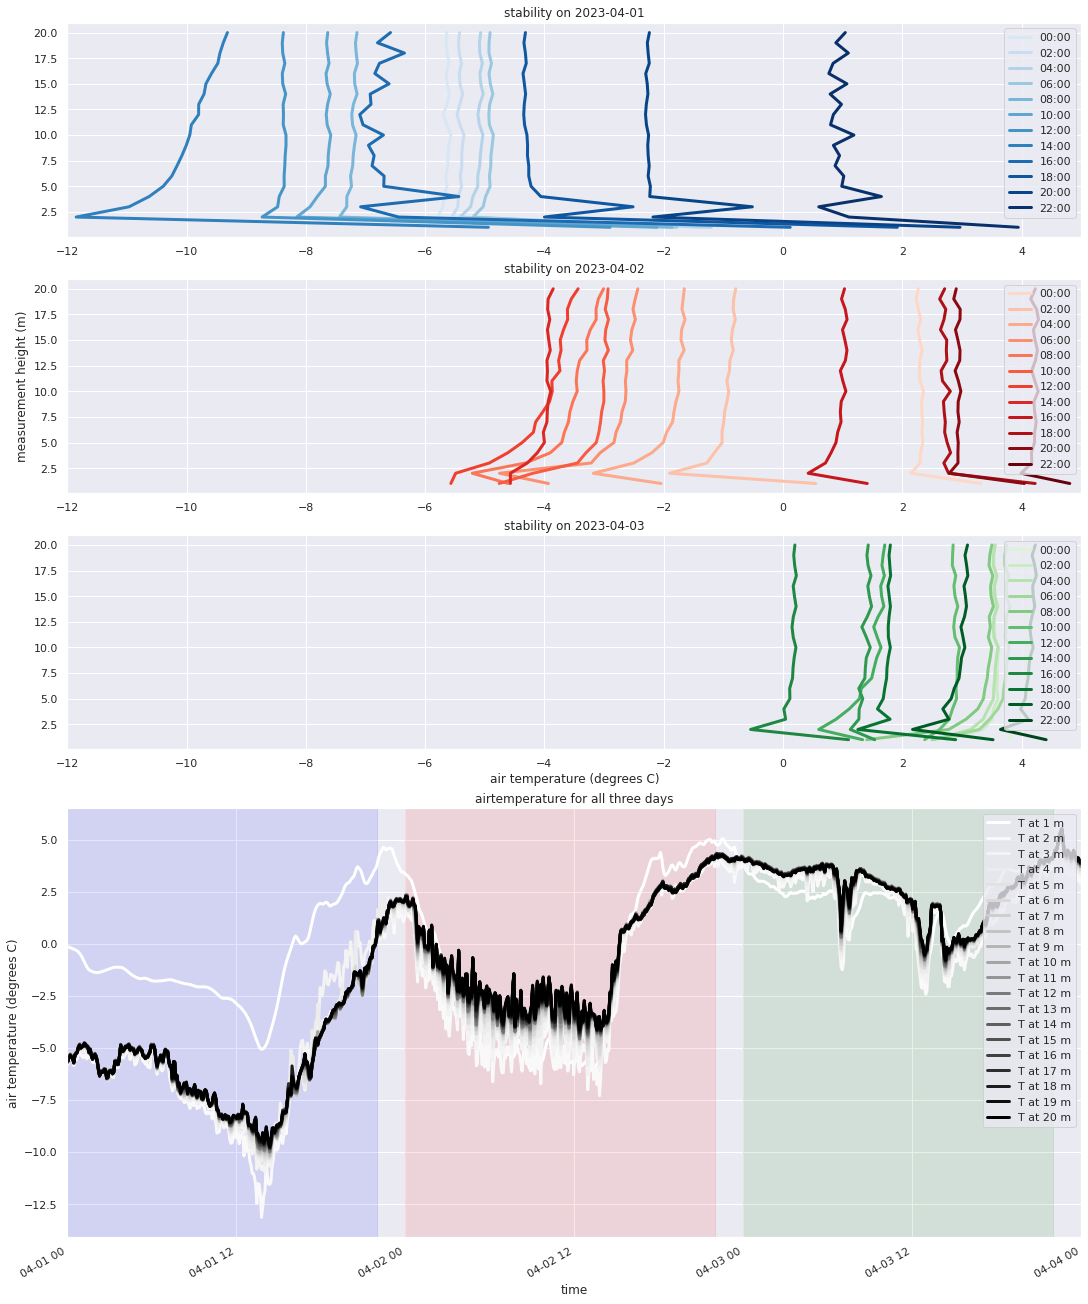

In [24]:
fig, axes = plt.subplots(4, 1, figsize=(15,18), constrained_layout=True, squeeze=True, gridspec_kw={'height_ratios': [1, 1, 1, 2]})

width=3
colors5 = plt.cm.Blues(np.linspace(0, 1, 14)) 
colors6 = plt.cm.Reds(np.linspace(0, 1, 14)) 
colors7 = plt.cm.Greens(np.linspace(0, 1, 14)) 

# day a
axes[0].plot(aT_slice0, aT_slice0['height'], label='00:00',  linewidth = width, color=colors5[2])
axes[0].plot(aT_slice1, aT_slice1['height'], label='02:00',  linewidth = width, color=colors5[3])
axes[0].plot(aT_slice2, aT_slice2['height'], label='04:00',  linewidth = width, color=colors5[4])
axes[0].plot(aT_slice3, aT_slice3['height'], label='06:00',  linewidth = width, color=colors5[5])
axes[0].plot(aT_slice4, aT_slice4['height'], label='08:00',  linewidth = width, color=colors5[6])
axes[0].plot(aT_slice5, aT_slice5['height'], label='10:00', linewidth = width, color=colors5[7])
axes[0].plot(aT_slice6, aT_slice6['height'], label='12:00', linewidth = width, color=colors5[8])
axes[0].plot(aT_slice7, aT_slice7['height'], label='14:00', linewidth = width, color=colors5[9])
axes[0].plot(aT_slice8, aT_slice8['height'], label='16:00', linewidth = width, color=colors5[10])
axes[0].plot(aT_slice9, aT_slice9['height'], label='18:00', linewidth = width, color=colors5[11])
axes[0].plot(aT_slice10, aT_slice10['height'], label='20:00', linewidth = width, color=colors5[12])
axes[0].plot(aT_slice11, aT_slice11['height'], label='22:00', linewidth = width, color=colors5[13])

# day b
axes[1].plot(bT_slice0, bT_slice0['height'], label='00:00',  linewidth = width, color=colors6[2])
axes[1].plot(bT_slice1, bT_slice1['height'], label='02:00',  linewidth = width, color=colors6[3])
axes[1].plot(bT_slice2, bT_slice2['height'], label='04:00',  linewidth = width, color=colors6[4])
axes[1].plot(bT_slice3, bT_slice3['height'], label='06:00',  linewidth = width, color=colors6[5])
axes[1].plot(bT_slice4, bT_slice4['height'], label='08:00',  linewidth = width, color=colors6[6])
axes[1].plot(bT_slice5, bT_slice5['height'], label='10:00', linewidth = width, color=colors6[7])
axes[1].plot(bT_slice6, bT_slice6['height'], label='12:00', linewidth = width, color=colors6[8])
axes[1].plot(bT_slice7, bT_slice7['height'], label='14:00', linewidth = width, color=colors6[9])
axes[1].plot(bT_slice8, bT_slice8['height'], label='16:00', linewidth = width, color=colors6[10])
axes[1].plot(bT_slice9, bT_slice9['height'], label='18:00', linewidth = width, color=colors6[11])
axes[1].plot(bT_slice10, bT_slice10['height'], label='20:00', linewidth = width, color=colors6[12])
axes[1].plot(bT_slice11, bT_slice11['height'], label='22:00', linewidth = width, color=colors6[13])

# day c
axes[2].plot(cT_slice0, cT_slice0['height'], label='00:00',  linewidth = width, color=colors7[2])
axes[2].plot(cT_slice1, cT_slice1['height'], label='02:00',  linewidth = width, color=colors7[3])
axes[2].plot(cT_slice2, cT_slice2['height'], label='04:00',  linewidth = width, color=colors7[4])
axes[2].plot(cT_slice3, cT_slice3['height'], label='06:00',  linewidth = width, color=colors7[5])
axes[2].plot(cT_slice4, cT_slice4['height'], label='08:00',  linewidth = width, color=colors7[6])
axes[2].plot(cT_slice5, cT_slice5['height'], label='10:00', linewidth = width, color=colors7[7])
axes[2].plot(cT_slice6, cT_slice6['height'], label='12:00', linewidth = width, color=colors7[8])
axes[2].plot(cT_slice7, cT_slice7['height'], label='14:00', linewidth = width, color=colors7[9])
axes[2].plot(cT_slice8, cT_slice8['height'], label='16:00', linewidth = width, color=colors7[10])
axes[2].plot(cT_slice9, cT_slice9['height'], label='18:00', linewidth = width, color=colors7[11])
axes[2].plot(cT_slice10, cT_slice10['height'], label='20:00', linewidth = width, color=colors7[12])
axes[2].plot(cT_slice11, cT_slice11['height'], label='22:00', linewidth = width, color=colors7[13])

colors3 = plt.cm.plasma(np.linspace(0, 1, 22)) 

# plotting sosds4 for the late-season timeframe (same as sosds3)
# sosds4['T_1m_c_dz'].plot(ax=axes[3], label='T at 1 m', linewidth = width, color=colors3[0])
# sosds4['T_2m_c_dz'].plot(ax=axes[3], label='T at 2 m', linewidth = width, color=colors3[1])
# sosds4['T_3m_c_dz'].plot(ax=axes[3], label='T at 3 m', linewidth = width, color=colors3[2])
# sosds4['T_4m_c_dz'].plot(ax=axes[3], label='T at 4 m', linewidth = width, color=colors3[3])
# sosds4['T_5m_c_dz'].plot(ax=axes[3], label='T at 5 m', linewidth = width, color=colors3[4])
# sosds4['T_6m_c_dz'].plot(ax=axes[3], label='T at 6 m', linewidth = width, color=colors3[5])
# sosds4['T_7m_c_dz'].plot(ax=axes[3], label='T at 7 m', linewidth = width, color=colors3[6])
# sosds4['T_8m_c_dz'].plot(ax=axes[3], label='T at 8 m', linewidth = width, color=colors3[7])
# sosds4['T_9m_c_dz'].plot(ax=axes[3], label='T at 9 m', linewidth = width, color=colors3[8])
# sosds4['T_10m_c_dz'].plot(ax=axes[3], label='T at 10 m', linewidth = width, color=colors3[9])
# sosds4['T_11m_c_dz'].plot(ax=axes[3], label='T at 11 m', linewidth = width, color=colors3[10])
# sosds4['T_12m_c_dz'].plot(ax=axes[3], label='T at 12 m', linewidth = width, color=colors3[12])
# sosds4['T_13m_c_dz'].plot(ax=axes[3], label='T at 13 m', linewidth = width, color=colors3[13])
# sosds4['T_14m_c_dz'].plot(ax=axes[3], label='T at 14 m', linewidth = width, color=colors3[14])
# sosds4['T_15m_c_dz'].plot(ax=axes[3], label='T at 15 m', linewidth = width, color=colors3[15])
# sosds4['T_16m_c_dz'].plot(ax=axes[3], label='T at 16 m', linewidth = width, color=colors3[16])
# sosds4['T_17m_c_dz'].plot(ax=axes[3], label='T at 17 m', linewidth = width, color=colors3[17])
# sosds4['T_18m_c_dz'].plot(ax=axes[3], label='T at 18 m', linewidth = width, color=colors3[18])
# sosds4['T_19m_c_dz'].plot(ax=axes[3], label='T at 19 m', linewidth = width, color=colors3[19])
# sosds4['T_20m_c_dz'].plot(ax=axes[3], label='T at 20 m', linewidth = width, color=colors3[20])


colors8 = plt.cm.Greys(np.linspace(0, 1, 21))

sosds4['T_1m_c'].plot(ax=axes[3], label='T at 1 m', linewidth = width, color=colors8[0])
sosds4['T_2m_c'].plot(ax=axes[3], label='T at 2 m', linewidth = width, color=colors8[1])
sosds4['T_3m_c'].plot(ax=axes[3], label='T at 3 m', linewidth = width, color=colors8[2])
sosds4['T_4m_c'].plot(ax=axes[3], label='T at 4 m', linewidth = width, color=colors8[3])
sosds4['T_5m_c'].plot(ax=axes[3], label='T at 5 m', linewidth = width, color=colors8[4])
sosds4['T_6m_c'].plot(ax=axes[3], label='T at 6 m', linewidth = width, color=colors8[5])
sosds4['T_7m_c'].plot(ax=axes[3], label='T at 7 m', linewidth = width, color=colors8[6])
sosds4['T_8m_c'].plot(ax=axes[3], label='T at 8 m', linewidth = width, color=colors8[7])
sosds4['T_9m_c'].plot(ax=axes[3], label='T at 9 m', linewidth = width, color=colors8[8])
sosds4['T_10m_c'].plot(ax=axes[3], label='T at 10 m', linewidth = width, color=colors8[9])
sosds4['T_11m_c'].plot(ax=axes[3], label='T at 11 m', linewidth = width, color=colors8[10])
sosds4['T_12m_c'].plot(ax=axes[3], label='T at 12 m', linewidth = width, color=colors8[12])
sosds4['T_13m_c'].plot(ax=axes[3], label='T at 13 m', linewidth = width, color=colors8[13])
sosds4['T_14m_c'].plot(ax=axes[3], label='T at 14 m', linewidth = width, color=colors8[14])
sosds4['T_15m_c'].plot(ax=axes[3], label='T at 15 m', linewidth = width, color=colors8[15])
sosds4['T_16m_c'].plot(ax=axes[3], label='T at 16 m', linewidth = width, color=colors8[16])
sosds4['T_17m_c'].plot(ax=axes[3], label='T at 17 m', linewidth = width, color=colors8[17])
sosds4['T_18m_c'].plot(ax=axes[3], label='T at 18 m', linewidth = width, color=colors8[18])
sosds4['T_19m_c'].plot(ax=axes[3], label='T at 19 m', linewidth = width, color=colors8[19])
sosds4['T_20m_c'].plot(ax=axes[3], label='T at 20 m', linewidth = width, color=colors8[20])

axes[3].set_xlim(dt.datetime(2023,4,1), dt.datetime(2023,4,4))  # three days in the fourth range

# shade a, b, and c ranges 
axes[3].axvspan(dt.datetime(2023,4,1,0), dt.datetime(2023,4,1,22), alpha=0.1, color='blue')
axes[3].axvspan(dt.datetime(2023,4,2,0), dt.datetime(2023,4,2,22), alpha=0.1, color='red')
axes[3].axvspan(dt.datetime(2023,4,3,0), dt.datetime(2023,4,3,22), alpha=0.1, color='green')

# legends et al. 
axes[0].set_title('stability on 2023-04-01')
axes[1].set_title('stability on 2023-04-02')
axes[2].set_title('stability on 2023-04-03')

axes[3].set_title('airtemperature for all three days')

axes[2].set_xlabel('air temperature (degrees C)')
axes[1].set_ylabel('measurement height (m)')

axes[3].set_ylabel('air temperature (degrees C)')

axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[2].legend(loc='upper right')
axes[3].legend(loc='upper right')

axes[0].set_xlim([-12,5])
axes[1].set_xlim([-12,5])
axes[2].set_xlim([-12,5])

(-12.0, 5.0)

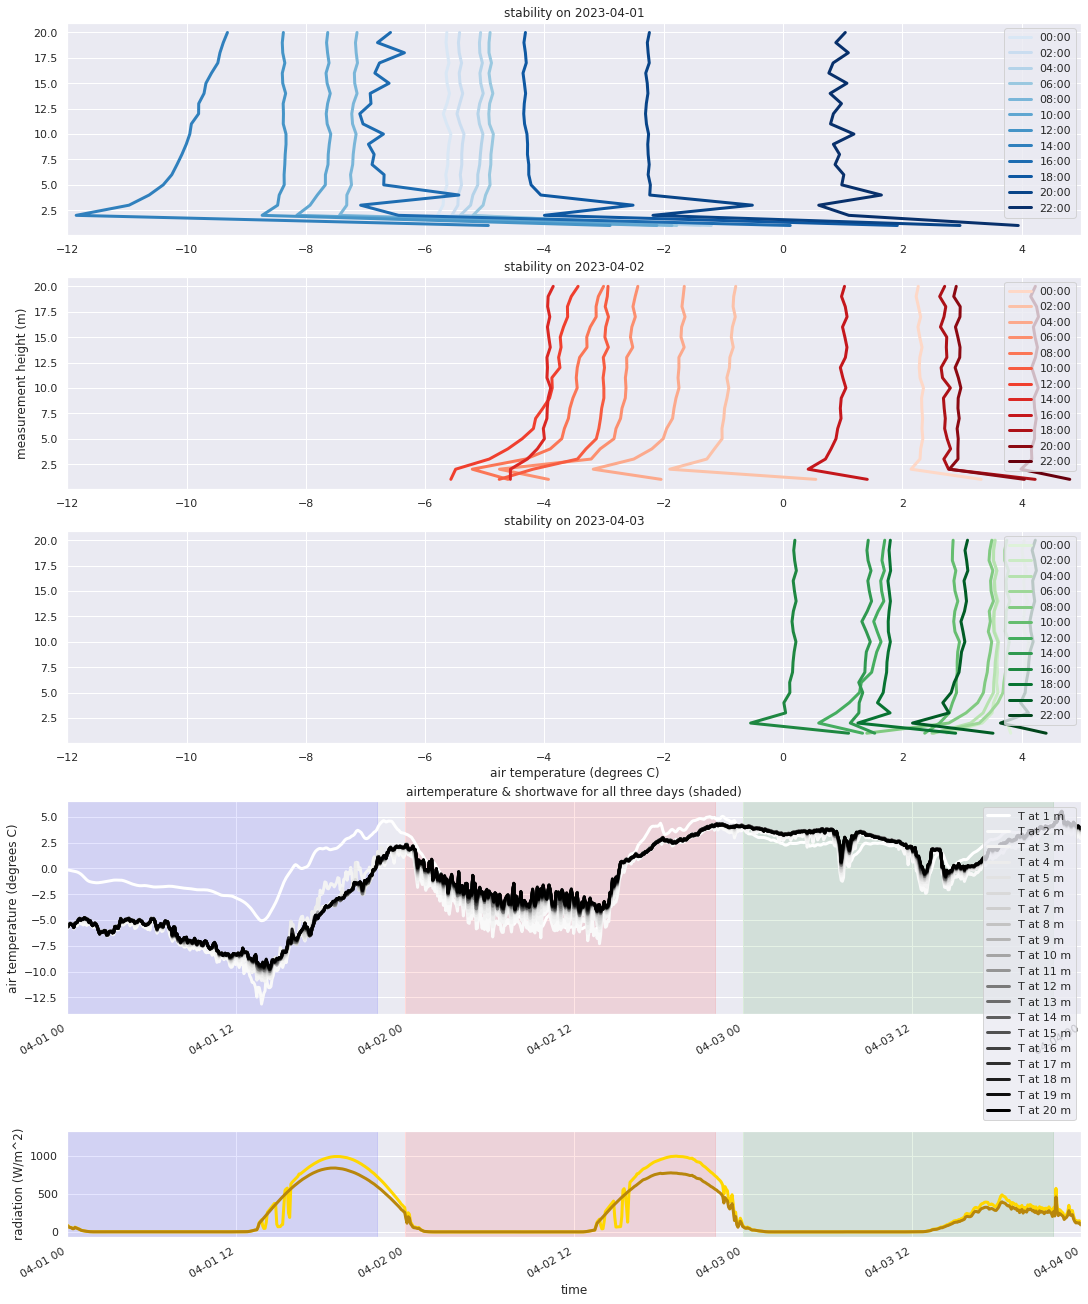

In [25]:
fig, axes = plt.subplots(5, 1, figsize=(15,18), constrained_layout=True, squeeze=True, gridspec_kw={'height_ratios': [1, 1, 1, 1, .5]})

width=3
colors5 = plt.cm.Blues(np.linspace(0, 1, 14)) 
colors6 = plt.cm.Reds(np.linspace(0, 1, 14)) 
colors7 = plt.cm.Greens(np.linspace(0, 1, 14)) 

# day a
axes[0].plot(aT_slice0, aT_slice0['height'], label='00:00',  linewidth = width, color=colors5[2])
axes[0].plot(aT_slice1, aT_slice1['height'], label='02:00',  linewidth = width, color=colors5[3])
axes[0].plot(aT_slice2, aT_slice2['height'], label='04:00',  linewidth = width, color=colors5[4])
axes[0].plot(aT_slice3, aT_slice3['height'], label='06:00',  linewidth = width, color=colors5[5])
axes[0].plot(aT_slice4, aT_slice4['height'], label='08:00',  linewidth = width, color=colors5[6])
axes[0].plot(aT_slice5, aT_slice5['height'], label='10:00', linewidth = width, color=colors5[7])
axes[0].plot(aT_slice6, aT_slice6['height'], label='12:00', linewidth = width, color=colors5[8])
axes[0].plot(aT_slice7, aT_slice7['height'], label='14:00', linewidth = width, color=colors5[9])
axes[0].plot(aT_slice8, aT_slice8['height'], label='16:00', linewidth = width, color=colors5[10])
axes[0].plot(aT_slice9, aT_slice9['height'], label='18:00', linewidth = width, color=colors5[11])
axes[0].plot(aT_slice10, aT_slice10['height'], label='20:00', linewidth = width, color=colors5[12])
axes[0].plot(aT_slice11, aT_slice11['height'], label='22:00', linewidth = width, color=colors5[13])

# day b
axes[1].plot(bT_slice0, bT_slice0['height'], label='00:00',  linewidth = width, color=colors6[2])
axes[1].plot(bT_slice1, bT_slice1['height'], label='02:00',  linewidth = width, color=colors6[3])
axes[1].plot(bT_slice2, bT_slice2['height'], label='04:00',  linewidth = width, color=colors6[4])
axes[1].plot(bT_slice3, bT_slice3['height'], label='06:00',  linewidth = width, color=colors6[5])
axes[1].plot(bT_slice4, bT_slice4['height'], label='08:00',  linewidth = width, color=colors6[6])
axes[1].plot(bT_slice5, bT_slice5['height'], label='10:00', linewidth = width, color=colors6[7])
axes[1].plot(bT_slice6, bT_slice6['height'], label='12:00', linewidth = width, color=colors6[8])
axes[1].plot(bT_slice7, bT_slice7['height'], label='14:00', linewidth = width, color=colors6[9])
axes[1].plot(bT_slice8, bT_slice8['height'], label='16:00', linewidth = width, color=colors6[10])
axes[1].plot(bT_slice9, bT_slice9['height'], label='18:00', linewidth = width, color=colors6[11])
axes[1].plot(bT_slice10, bT_slice10['height'], label='20:00', linewidth = width, color=colors6[12])
axes[1].plot(bT_slice11, bT_slice11['height'], label='22:00', linewidth = width, color=colors6[13])

# day c
axes[2].plot(cT_slice0, cT_slice0['height'], label='00:00',  linewidth = width, color=colors7[2])
axes[2].plot(cT_slice1, cT_slice1['height'], label='02:00',  linewidth = width, color=colors7[3])
axes[2].plot(cT_slice2, cT_slice2['height'], label='04:00',  linewidth = width, color=colors7[4])
axes[2].plot(cT_slice3, cT_slice3['height'], label='06:00',  linewidth = width, color=colors7[5])
axes[2].plot(cT_slice4, cT_slice4['height'], label='08:00',  linewidth = width, color=colors7[6])
axes[2].plot(cT_slice5, cT_slice5['height'], label='10:00', linewidth = width, color=colors7[7])
axes[2].plot(cT_slice6, cT_slice6['height'], label='12:00', linewidth = width, color=colors7[8])
axes[2].plot(cT_slice7, cT_slice7['height'], label='14:00', linewidth = width, color=colors7[9])
axes[2].plot(cT_slice8, cT_slice8['height'], label='16:00', linewidth = width, color=colors7[10])
axes[2].plot(cT_slice9, cT_slice9['height'], label='18:00', linewidth = width, color=colors7[11])
axes[2].plot(cT_slice10, cT_slice10['height'], label='20:00', linewidth = width, color=colors7[12])
axes[2].plot(cT_slice11, cT_slice11['height'], label='22:00', linewidth = width, color=colors7[13])

colors3 = plt.cm.plasma(np.linspace(0, 1, 22)) 

# plotting sosds4 for the late-season timeframe (same as sosds3)
# sosds4['T_1m_c_dz'].plot(ax=axes[3], label='T at 1 m', linewidth = width, color=colors3[0])
# sosds4['T_2m_c_dz'].plot(ax=axes[3], label='T at 2 m', linewidth = width, color=colors3[1])
# sosds4['T_3m_c_dz'].plot(ax=axes[3], label='T at 3 m', linewidth = width, color=colors3[2])
# sosds4['T_4m_c_dz'].plot(ax=axes[3], label='T at 4 m', linewidth = width, color=colors3[3])
# sosds4['T_5m_c_dz'].plot(ax=axes[3], label='T at 5 m', linewidth = width, color=colors3[4])
# sosds4['T_6m_c_dz'].plot(ax=axes[3], label='T at 6 m', linewidth = width, color=colors3[5])
# sosds4['T_7m_c_dz'].plot(ax=axes[3], label='T at 7 m', linewidth = width, color=colors3[6])
# sosds4['T_8m_c_dz'].plot(ax=axes[3], label='T at 8 m', linewidth = width, color=colors3[7])
# sosds4['T_9m_c_dz'].plot(ax=axes[3], label='T at 9 m', linewidth = width, color=colors3[8])
# sosds4['T_10m_c_dz'].plot(ax=axes[3], label='T at 10 m', linewidth = width, color=colors3[9])
# sosds4['T_11m_c_dz'].plot(ax=axes[3], label='T at 11 m', linewidth = width, color=colors3[10])
# sosds4['T_12m_c_dz'].plot(ax=axes[3], label='T at 12 m', linewidth = width, color=colors3[12])
# sosds4['T_13m_c_dz'].plot(ax=axes[3], label='T at 13 m', linewidth = width, color=colors3[13])
# sosds4['T_14m_c_dz'].plot(ax=axes[3], label='T at 14 m', linewidth = width, color=colors3[14])
# sosds4['T_15m_c_dz'].plot(ax=axes[3], label='T at 15 m', linewidth = width, color=colors3[15])
# sosds4['T_16m_c_dz'].plot(ax=axes[3], label='T at 16 m', linewidth = width, color=colors3[16])
# sosds4['T_17m_c_dz'].plot(ax=axes[3], label='T at 17 m', linewidth = width, color=colors3[17])
# sosds4['T_18m_c_dz'].plot(ax=axes[3], label='T at 18 m', linewidth = width, color=colors3[18])
# sosds4['T_19m_c_dz'].plot(ax=axes[3], label='T at 19 m', linewidth = width, color=colors3[19])
# sosds4['T_20m_c_dz'].plot(ax=axes[3], label='T at 20 m', linewidth = width, color=colors3[20])


colors8 = plt.cm.Greys(np.linspace(0, 1, 21))

sosds4['T_1m_c'].plot(ax=axes[3], label='T at 1 m', linewidth = width, color=colors8[0])
sosds4['T_2m_c'].plot(ax=axes[3], label='T at 2 m', linewidth = width, color=colors8[1])
sosds4['T_3m_c'].plot(ax=axes[3], label='T at 3 m', linewidth = width, color=colors8[2])
sosds4['T_4m_c'].plot(ax=axes[3], label='T at 4 m', linewidth = width, color=colors8[3])
sosds4['T_5m_c'].plot(ax=axes[3], label='T at 5 m', linewidth = width, color=colors8[4])
sosds4['T_6m_c'].plot(ax=axes[3], label='T at 6 m', linewidth = width, color=colors8[5])
sosds4['T_7m_c'].plot(ax=axes[3], label='T at 7 m', linewidth = width, color=colors8[6])
sosds4['T_8m_c'].plot(ax=axes[3], label='T at 8 m', linewidth = width, color=colors8[7])
sosds4['T_9m_c'].plot(ax=axes[3], label='T at 9 m', linewidth = width, color=colors8[8])
sosds4['T_10m_c'].plot(ax=axes[3], label='T at 10 m', linewidth = width, color=colors8[9])
sosds4['T_11m_c'].plot(ax=axes[3], label='T at 11 m', linewidth = width, color=colors8[10])
sosds4['T_12m_c'].plot(ax=axes[3], label='T at 12 m', linewidth = width, color=colors8[12])
sosds4['T_13m_c'].plot(ax=axes[3], label='T at 13 m', linewidth = width, color=colors8[13])
sosds4['T_14m_c'].plot(ax=axes[3], label='T at 14 m', linewidth = width, color=colors8[14])
sosds4['T_15m_c'].plot(ax=axes[3], label='T at 15 m', linewidth = width, color=colors8[15])
sosds4['T_16m_c'].plot(ax=axes[3], label='T at 16 m', linewidth = width, color=colors8[16])
sosds4['T_17m_c'].plot(ax=axes[3], label='T at 17 m', linewidth = width, color=colors8[17])
sosds4['T_18m_c'].plot(ax=axes[3], label='T at 18 m', linewidth = width, color=colors8[18])
sosds4['T_19m_c'].plot(ax=axes[3], label='T at 19 m', linewidth = width, color=colors8[19])
sosds4['T_20m_c'].plot(ax=axes[3], label='T at 20 m', linewidth = width, color=colors8[20])

axes[3].set_xlim(dt.datetime(2023,4,1), dt.datetime(2023,4,4))  # three days in the fourth range

# shade a, b, and c ranges 
axes[3].axvspan(dt.datetime(2023,4,1,0), dt.datetime(2023,4,1,22), alpha=0.1, color='blue')
axes[3].axvspan(dt.datetime(2023,4,2,0), dt.datetime(2023,4,2,22), alpha=0.1, color='red')
axes[3].axvspan(dt.datetime(2023,4,3,0), dt.datetime(2023,4,3,22), alpha=0.1, color='green')

# shortwave from HW5 dataset 
sos_ds_april['Rsw_in_9m_d'].plot(ax=axes[4], label='sos: downward shortwave', linewidth=width, color='gold')
sos_ds_april['Rsw_out_9m_d'].plot(ax=axes[4], label='sos: upward shortwave',linewidth=width, color='darkgoldenrod')

# shade a, b, and c ranges 
axes[4].axvspan(dt.datetime(2023,4,1,0), dt.datetime(2023,4,1,22), alpha=0.1, color='blue')
axes[4].axvspan(dt.datetime(2023,4,2,0), dt.datetime(2023,4,2,22), alpha=0.1, color='red')
axes[4].axvspan(dt.datetime(2023,4,3,0), dt.datetime(2023,4,3,22), alpha=0.1, color='green')

axes[4].set_xlim(dt.datetime(2023,4,1), dt.datetime(2023,4,4))  # three days in the fourth range
axes[4].set_ylabel("radiation (W/m^2)")

# legends et al. 
axes[0].set_title('stability on 2023-04-01')
axes[1].set_title('stability on 2023-04-02')
axes[2].set_title('stability on 2023-04-03')

axes[3].set_title('airtemperature & shortwave for all three days (shaded)')

axes[2].set_xlabel('air temperature (degrees C)')
axes[1].set_ylabel('measurement height (m)')

axes[3].set_ylabel('air temperature (degrees C)')

axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[2].legend(loc='upper right')
axes[3].legend(loc='upper right')

axes[3].set_xlabel('')

axes[0].set_xlim([-12,5])
axes[1].set_xlim([-12,5])
axes[2].set_xlim([-12,5])

*okay, this is in UTC. I need to plot only the night into the daytime*

(-12.0, 5.0)

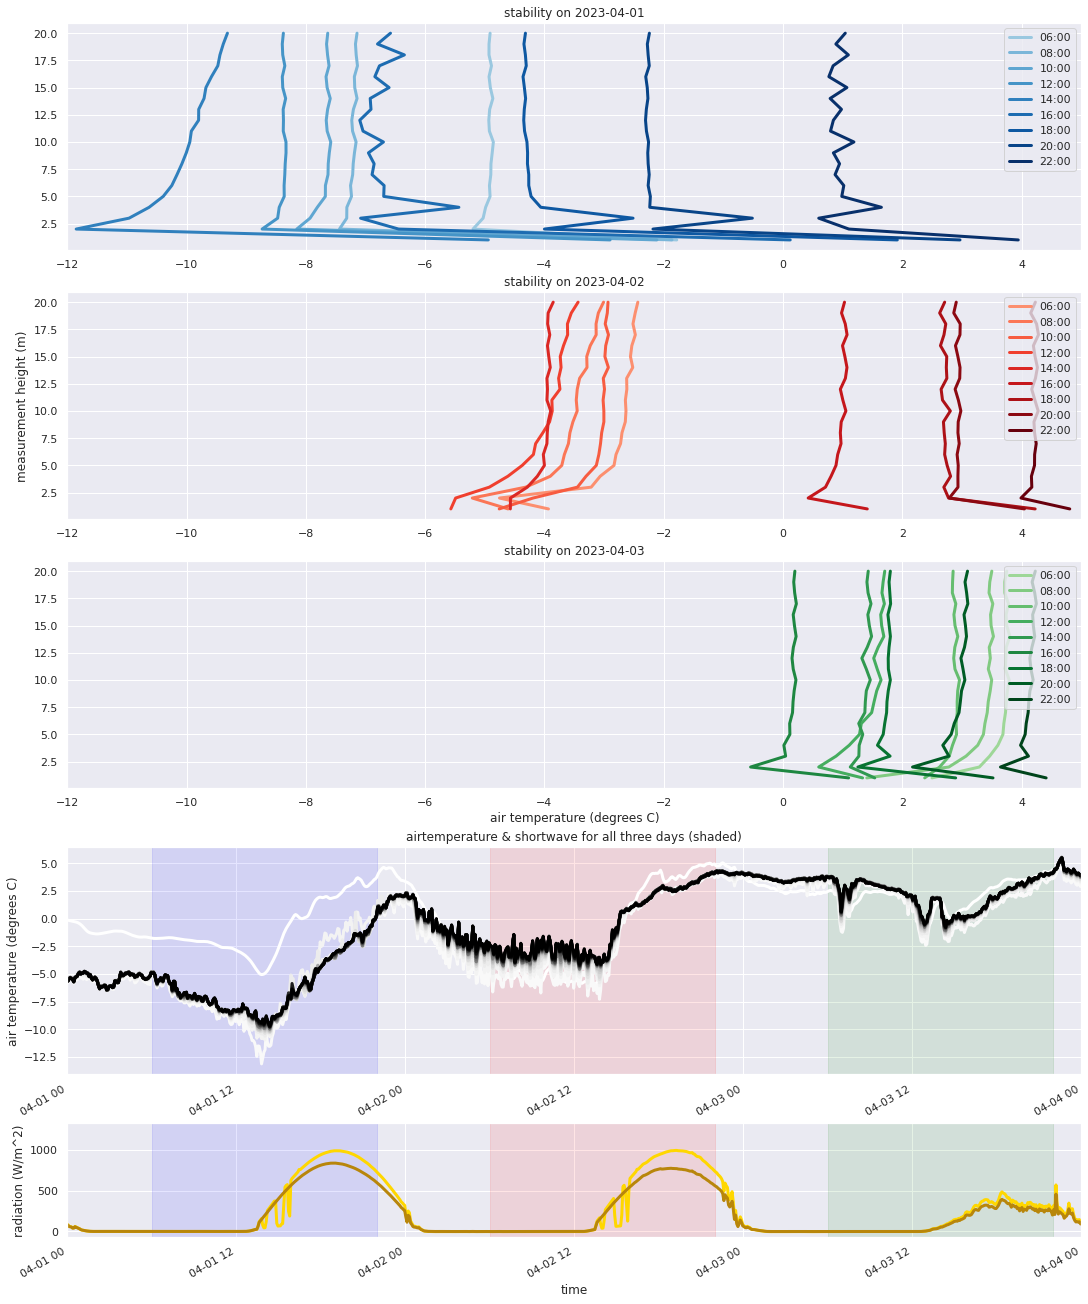

In [26]:
fig, axes = plt.subplots(5, 1, figsize=(15,18), constrained_layout=True, squeeze=True, gridspec_kw={'height_ratios': [1, 1, 1, 1, .5]})

width=3
colors5 = plt.cm.Blues(np.linspace(0, 1, 14)) 
colors6 = plt.cm.Reds(np.linspace(0, 1, 14)) 
colors7 = plt.cm.Greens(np.linspace(0, 1, 14)) 

# day a
# axes[0].plot(aT_slice0, aT_slice0['height'], label='00:00',  linewidth = width, color=colors5[2])
# axes[0].plot(aT_slice1, aT_slice1['height'], label='02:00',  linewidth = width, color=colors5[3])
# axes[0].plot(aT_slice2, aT_slice2['height'], label='04:00',  linewidth = width, color=colors5[4])
axes[0].plot(aT_slice3, aT_slice3['height'], label='06:00',  linewidth = width, color=colors5[5])
axes[0].plot(aT_slice4, aT_slice4['height'], label='08:00',  linewidth = width, color=colors5[6])
axes[0].plot(aT_slice5, aT_slice5['height'], label='10:00', linewidth = width, color=colors5[7])
axes[0].plot(aT_slice6, aT_slice6['height'], label='12:00', linewidth = width, color=colors5[8])
axes[0].plot(aT_slice7, aT_slice7['height'], label='14:00', linewidth = width, color=colors5[9])
axes[0].plot(aT_slice8, aT_slice8['height'], label='16:00', linewidth = width, color=colors5[10])
axes[0].plot(aT_slice9, aT_slice9['height'], label='18:00', linewidth = width, color=colors5[11])
axes[0].plot(aT_slice10, aT_slice10['height'], label='20:00', linewidth = width, color=colors5[12])
axes[0].plot(aT_slice11, aT_slice11['height'], label='22:00', linewidth = width, color=colors5[13])

# day b
# axes[1].plot(bT_slice0, bT_slice0['height'], label='00:00',  linewidth = width, color=colors6[2])
# axes[1].plot(bT_slice1, bT_slice1['height'], label='02:00',  linewidth = width, color=colors6[3])
# axes[1].plot(bT_slice2, bT_slice2['height'], label='04:00',  linewidth = width, color=colors6[4])
axes[1].plot(bT_slice3, bT_slice3['height'], label='06:00',  linewidth = width, color=colors6[5])
axes[1].plot(bT_slice4, bT_slice4['height'], label='08:00',  linewidth = width, color=colors6[6])
axes[1].plot(bT_slice5, bT_slice5['height'], label='10:00', linewidth = width, color=colors6[7])
axes[1].plot(bT_slice6, bT_slice6['height'], label='12:00', linewidth = width, color=colors6[8])
axes[1].plot(bT_slice7, bT_slice7['height'], label='14:00', linewidth = width, color=colors6[9])
axes[1].plot(bT_slice8, bT_slice8['height'], label='16:00', linewidth = width, color=colors6[10])
axes[1].plot(bT_slice9, bT_slice9['height'], label='18:00', linewidth = width, color=colors6[11])
axes[1].plot(bT_slice10, bT_slice10['height'], label='20:00', linewidth = width, color=colors6[12])
axes[1].plot(bT_slice11, bT_slice11['height'], label='22:00', linewidth = width, color=colors6[13])

# day c
# axes[2].plot(cT_slice0, cT_slice0['height'], label='00:00',  linewidth = width, color=colors7[2])
# axes[2].plot(cT_slice1, cT_slice1['height'], label='02:00',  linewidth = width, color=colors7[3])
# axes[2].plot(cT_slice2, cT_slice2['height'], label='04:00',  linewidth = width, color=colors7[4])
axes[2].plot(cT_slice3, cT_slice3['height'], label='06:00',  linewidth = width, color=colors7[5])
axes[2].plot(cT_slice4, cT_slice4['height'], label='08:00',  linewidth = width, color=colors7[6])
axes[2].plot(cT_slice5, cT_slice5['height'], label='10:00', linewidth = width, color=colors7[7])
axes[2].plot(cT_slice6, cT_slice6['height'], label='12:00', linewidth = width, color=colors7[8])
axes[2].plot(cT_slice7, cT_slice7['height'], label='14:00', linewidth = width, color=colors7[9])
axes[2].plot(cT_slice8, cT_slice8['height'], label='16:00', linewidth = width, color=colors7[10])
axes[2].plot(cT_slice9, cT_slice9['height'], label='18:00', linewidth = width, color=colors7[11])
axes[2].plot(cT_slice10, cT_slice10['height'], label='20:00', linewidth = width, color=colors7[12])
axes[2].plot(cT_slice11, cT_slice11['height'], label='22:00', linewidth = width, color=colors7[13])

colors3 = plt.cm.plasma(np.linspace(0, 1, 22)) 

# plotting sosds4 for the late-season timeframe (same as sosds3)
# sosds4['T_1m_c_dz'].plot(ax=axes[3], label='T at 1 m', linewidth = width, color=colors3[0])
# sosds4['T_2m_c_dz'].plot(ax=axes[3], label='T at 2 m', linewidth = width, color=colors3[1])
# sosds4['T_3m_c_dz'].plot(ax=axes[3], label='T at 3 m', linewidth = width, color=colors3[2])
# sosds4['T_4m_c_dz'].plot(ax=axes[3], label='T at 4 m', linewidth = width, color=colors3[3])
# sosds4['T_5m_c_dz'].plot(ax=axes[3], label='T at 5 m', linewidth = width, color=colors3[4])
# sosds4['T_6m_c_dz'].plot(ax=axes[3], label='T at 6 m', linewidth = width, color=colors3[5])
# sosds4['T_7m_c_dz'].plot(ax=axes[3], label='T at 7 m', linewidth = width, color=colors3[6])
# sosds4['T_8m_c_dz'].plot(ax=axes[3], label='T at 8 m', linewidth = width, color=colors3[7])
# sosds4['T_9m_c_dz'].plot(ax=axes[3], label='T at 9 m', linewidth = width, color=colors3[8])
# sosds4['T_10m_c_dz'].plot(ax=axes[3], label='T at 10 m', linewidth = width, color=colors3[9])
# sosds4['T_11m_c_dz'].plot(ax=axes[3], label='T at 11 m', linewidth = width, color=colors3[10])
# sosds4['T_12m_c_dz'].plot(ax=axes[3], label='T at 12 m', linewidth = width, color=colors3[12])
# sosds4['T_13m_c_dz'].plot(ax=axes[3], label='T at 13 m', linewidth = width, color=colors3[13])
# sosds4['T_14m_c_dz'].plot(ax=axes[3], label='T at 14 m', linewidth = width, color=colors3[14])
# sosds4['T_15m_c_dz'].plot(ax=axes[3], label='T at 15 m', linewidth = width, color=colors3[15])
# sosds4['T_16m_c_dz'].plot(ax=axes[3], label='T at 16 m', linewidth = width, color=colors3[16])
# sosds4['T_17m_c_dz'].plot(ax=axes[3], label='T at 17 m', linewidth = width, color=colors3[17])
# sosds4['T_18m_c_dz'].plot(ax=axes[3], label='T at 18 m', linewidth = width, color=colors3[18])
# sosds4['T_19m_c_dz'].plot(ax=axes[3], label='T at 19 m', linewidth = width, color=colors3[19])
# sosds4['T_20m_c_dz'].plot(ax=axes[3], label='T at 20 m', linewidth = width, color=colors3[20])


colors8 = plt.cm.Greys(np.linspace(0, 1, 21))

sosds4['T_1m_c'].plot(ax=axes[3], label='T at 1 m', linewidth = width, color=colors8[0])
sosds4['T_2m_c'].plot(ax=axes[3], label='T at 2 m', linewidth = width, color=colors8[1])
sosds4['T_3m_c'].plot(ax=axes[3], label='T at 3 m', linewidth = width, color=colors8[2])
sosds4['T_4m_c'].plot(ax=axes[3], label='T at 4 m', linewidth = width, color=colors8[3])
sosds4['T_5m_c'].plot(ax=axes[3], label='T at 5 m', linewidth = width, color=colors8[4])
sosds4['T_6m_c'].plot(ax=axes[3], label='T at 6 m', linewidth = width, color=colors8[5])
sosds4['T_7m_c'].plot(ax=axes[3], label='T at 7 m', linewidth = width, color=colors8[6])
sosds4['T_8m_c'].plot(ax=axes[3], label='T at 8 m', linewidth = width, color=colors8[7])
sosds4['T_9m_c'].plot(ax=axes[3], label='T at 9 m', linewidth = width, color=colors8[8])
sosds4['T_10m_c'].plot(ax=axes[3], label='T at 10 m', linewidth = width, color=colors8[9])
sosds4['T_11m_c'].plot(ax=axes[3], label='T at 11 m', linewidth = width, color=colors8[10])
sosds4['T_12m_c'].plot(ax=axes[3], label='T at 12 m', linewidth = width, color=colors8[12])
sosds4['T_13m_c'].plot(ax=axes[3], label='T at 13 m', linewidth = width, color=colors8[13])
sosds4['T_14m_c'].plot(ax=axes[3], label='T at 14 m', linewidth = width, color=colors8[14])
sosds4['T_15m_c'].plot(ax=axes[3], label='T at 15 m', linewidth = width, color=colors8[15])
sosds4['T_16m_c'].plot(ax=axes[3], label='T at 16 m', linewidth = width, color=colors8[16])
sosds4['T_17m_c'].plot(ax=axes[3], label='T at 17 m', linewidth = width, color=colors8[17])
sosds4['T_18m_c'].plot(ax=axes[3], label='T at 18 m', linewidth = width, color=colors8[18])
sosds4['T_19m_c'].plot(ax=axes[3], label='T at 19 m', linewidth = width, color=colors8[19])
sosds4['T_20m_c'].plot(ax=axes[3], label='T at 20 m', linewidth = width, color=colors8[20])

axes[3].set_xlim(dt.datetime(2023,4,1), dt.datetime(2023,4,4))  # three days in the fourth range

# shade a, b, and c ranges 
axes[3].axvspan(dt.datetime(2023,4,1,6), dt.datetime(2023,4,1,22), alpha=0.1, color='blue')
axes[3].axvspan(dt.datetime(2023,4,2,6), dt.datetime(2023,4,2,22), alpha=0.1, color='red')
axes[3].axvspan(dt.datetime(2023,4,3,6), dt.datetime(2023,4,3,22), alpha=0.1, color='green')

# shortwave from HW5 dataset 
sos_ds_april['Rsw_in_9m_d'].plot(ax=axes[4], label='sos: downward shortwave', linewidth=width, color='gold')
sos_ds_april['Rsw_out_9m_d'].plot(ax=axes[4], label='sos: upward shortwave',linewidth=width, color='darkgoldenrod')

# shade a, b, and c ranges 
axes[4].axvspan(dt.datetime(2023,4,1,6), dt.datetime(2023,4,1,22), alpha=0.1, color='blue')
axes[4].axvspan(dt.datetime(2023,4,2,6), dt.datetime(2023,4,2,22), alpha=0.1, color='red')
axes[4].axvspan(dt.datetime(2023,4,3,6), dt.datetime(2023,4,3,22), alpha=0.1, color='green')

axes[4].set_xlim(dt.datetime(2023,4,1), dt.datetime(2023,4,4))  # three days in the fourth range
axes[4].set_ylabel("radiation (W/m^2)")

# legends et al. 
axes[0].set_title('stability on 2023-04-01')
axes[1].set_title('stability on 2023-04-02')
axes[2].set_title('stability on 2023-04-03')

axes[3].set_title('airtemperature & shortwave for all three days (shaded)')

axes[2].set_xlabel('air temperature (degrees C)')
axes[1].set_ylabel('measurement height (m)')

axes[3].set_ylabel('air temperature (degrees C)')

axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[2].legend(loc='upper right')
# axes[3].legend(loc='upper right')

axes[3].set_xlabel('')

axes[0].set_xlim([-12,5])
axes[1].set_xlim([-12,5])
axes[2].set_xlim([-12,5])

----------------------------------
### Problem 2: Solution
* The change in temperature with height is not linear, and it certainly changes depending on the day. 
* I plotted stabiltiy for three days. From early morning (before sunrise) to midday on April 01, 02, and 03. The colors all go from light to darker as the day progresses. 
* April 01 was clear and cold (in blue) and by April 03 there were clouds and it was much warmer (green)
* It seems like there are large differences in the stability throughout the day when it's clear skys (based on shortwave) compared to warmer days that are likely cloudy. 
* This can be seen from the cold days in blue, where the stability in smooth in the early morning, then the stablity becomes rough and jagged as the day progresses (darker colors).

I'm honestly having a little bit of a hard time intepreting these plots and this data on stablity. 
I think we should discuss more in class how this all relates to the snow surface. 

----------------------------------

#### calculate the slope at 2 meters and 20 meters height 

### $ \frac{dT}{dz} @ 2 m = \frac{temp[2] - temp[1]}{height[2] - height[1]} $  

### $ \frac{dT}{dz} @ 20 m = \frac{temp[20] - temp[1]}{height[20] - height[1]} $ 

*should run a regression for all the points between 1-20 instead for the slope at 20 meters... but I'm going to start here. There is a lot of data to look at.*

In [27]:
a_1m =  aT_slice5.where(aT_slice5['height'] ==  1).dropna(dim='height')
a_2m =  aT_slice5.where(aT_slice5['height'] ==  2).dropna(dim='height')
a_20m = aT_slice5.where(aT_slice5['height'] == 20).dropna(dim='height')

b_1m =  bT_slice5.where(bT_slice5['height'] ==  1).dropna(dim='height')
b_2m =  bT_slice5.where(bT_slice5['height'] ==  2).dropna(dim='height')
b_20m = bT_slice5.where(bT_slice5['height'] == 20).dropna(dim='height')

c_1m =  cT_slice5.where(cT_slice5['height'] ==  1).dropna(dim='height')
c_2m =  cT_slice5.where(cT_slice5['height'] ==  2).dropna(dim='height')
c_20m = cT_slice5.where(cT_slice5['height'] == 20).dropna(dim='height')

In [28]:
# slope_2m  = (temp[2] - temp[1]) / (height[2] - height[1])
# slope_20m = (temp[20] - temp[1]) / (height[20] - height[1])

a_slope_2m = (a_2m - a_1m) / (2-1) 
b_slope_2m = (b_2m - b_1m) / (2-1) 
c_slope_2m = (b_2m - c_1m) / (2-1) 

a_slope_20m = (a_20m - a_1m) / (20-1) 
b_slope_20m = (b_20m - b_1m) / (20-1) 
c_slope_20m = (b_20m - c_1m) / (20-1) 

In [29]:
## come back to problem 2 and the bonus if I have time. Turning this assignment in for now since it's taken a lot of time already. 